In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("TrainingWiDS2021.csv")

In [3]:
data.shape

(130157, 181)

- The dataset is big with many columns which are primarily medical factors/vitals of the patients

In [4]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
data.isnull().sum()

Unnamed: 0                          0
encounter_id                        0
hospital_id                         0
age                              4988
bmi                              4490
elective_surgery                    0
ethnicity                        1587
gender                             66
height                           2077
hospital_admit_source           33198
icu_admit_source                  240
icu_id                              0
icu_stay_type                       0
icu_type                            0
pre_icu_los_days                    0
readmission_status                  0
weight                           3463
albumin_apache                  78163
apache_2_diagnosis               1685
apache_3j_diagnosis               865
apache_post_operative               0
arf_apache                          0
bilirubin_apache                82560
bun_apache                      25411
creatinine_apache               24882
fio2_apache                     99720
gcs_eyes_apa

In [5]:
data_remove = data.columns[data.isnull().sum()>60000]

In [6]:
len(data_remove)

74

- There are 74 fields with more than 60000 null values which accounts for approx 50% of the rows. We can remove the fields

In [7]:
data.drop(data_remove,axis=1,inplace=True)

In [8]:
data.shape

(130157, 107)

In [9]:
data.describe(include='all')

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128570,130091,128080.000000,96959,129917,130157.000000,130157,130157,130157.000000,130157.0,126694.000000,128472.000000,129292.000000,130157.000000,130157.000000,104746.000000,105275.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,129349.000000,105638.00000,123546.000000,130157.000000,100682.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,124638.000000,124638.000000,118827.000000,118827.000000,100454.000000,100454.000000,116423.000000,116423.000000,113465.000000,113465.000000,116884.000000,116884.000000,121914.000000,121914.000000,110110.000000,110110.000000,113925.000000,113925.000000,114569.000000,114569.000000,111600.000000,111600.000000,117611.000000,117611.000000,116887.000000,116887.000000,112728.000000,112728.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,6,2,NaN,15,5,NaN,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Caucasian,M,NaN,Emergency Department,Accident & Emergency,NaN,admit,Med-Surg ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr

- Unnamed:0, encounter_id and hospital_id are just nominal values that represent serial number, unique patient identity and hospital identity which are not important for predicting the positive cases. The same can be removed as well

In [10]:
data.drop(['Unnamed: 0','encounter_id','hospital_id'],axis=1,inplace=True)

In [11]:
data.describe(include = 'all')

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,125169.000000,125667.000000,130157.000000,128570,130091,128080.000000,96959,129917,130157.000000,130157,130157,130157.000000,130157.0,126694.000000,128472.000000,129292.000000,130157.000000,130157.000000,104746.000000,105275.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,129349.000000,105638.00000,123546.000000,130157.000000,100682.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,124638.000000,124638.000000,118827.000000,118827.000000,100454.000000,100454.000000,116423.000000,116423.000000,113465.000000,113465.000000,116884.000000,116884.000000,121914.000000,121914.000000,110110.000000,110110.000000,113925.000000,113925.000000,114569.000000,114569.000000,111600.000000,111600.000000,117611.000000,117611.000000,116887.000000,116887.000000,112728.000000,112728.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
unique,NaN,NaN,NaN,6,2,NaN,15,5,NaN,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Caucasian,M,NaN,Emergency Department,Accident & Emergency,NaN,admit,Med-Surg ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,100236,70518,NaN,51258,76846,NaN,124741,71468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

- readmission_status seems to ba all 0 values. It needs to be verified and removed

In [12]:
data.readmission_status.nunique()

1

In [13]:
data.readmission_status.unique()  ## its just an array of zeroes

array([0], dtype=int64)

In [14]:
data.drop('readmission_status',axis= 1,inplace =True)

In [15]:
data.isnull().sum()

age                             4988
bmi                             4490
elective_surgery                   0
ethnicity                       1587
gender                            66
height                          2077
hospital_admit_source          33198
icu_admit_source                 240
icu_id                             0
icu_stay_type                      0
icu_type                           0
pre_icu_los_days                   0
weight                          3463
apache_2_diagnosis              1685
apache_3j_diagnosis              865
apache_post_operative              0
arf_apache                         0
bun_apache                     25411
creatinine_apache              24882
gcs_eyes_apache                 2190
gcs_motor_apache                2190
gcs_unable_apache                709
gcs_verbal_apache               2190
glucose_apache                 14696
heart_rate_apache                309
hematocrit_apache              26758
intubated_apache                   0
m

In [16]:
data.diabetes_mellitus.value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

- Missing Value Treatment 

In [17]:
data.age[data.diabetes_mellitus==0].mean()

61.27202645426811

In [18]:
data.age[data.diabetes_mellitus==1].mean()

64.56425739332873

In [19]:
data.age.mean()

61.99510262125606

- There is no much difference in age of persons with or without diabetes.So, we can replace age value with overall mean for null values

In [20]:
data.age.fillna(data.age.mean(),inplace=True)

In [21]:
data.age.isnull().sum()

0

In [22]:
data.groupby('diabetes_mellitus').bmi.mean()

diabetes_mellitus
0    28.375530
1    31.765574
Name: bmi, dtype: float64

- bmi could be varying based on ethnicity and gender

In [23]:
bmi_mean = data.groupby(['ethnicity','gender'])['bmi'].transform('mean')

In [24]:
bmi_mean

0         28.934182
1         29.259872
2         29.259872
3         29.259872
4         28.934182
            ...    
130152    28.934182
130153    29.259872
130154    28.588259
130155    28.934182
130156    28.588259
Name: bmi, Length: 130157, dtype: float64

In [25]:
data['bmi'].fillna(bmi_mean,inplace=True)

In [26]:
data['bmi'].isnull().sum() 

214

In [27]:
data['bmi']=data['bmi'].replace(np.nan,data['bmi'].mean())

In [28]:
data['bmi'].isnull().sum()  ##null values removed

0

In [29]:
data.elective_surgery.describe()

count    130157.000000
mean          0.189840
std           0.392176
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: elective_surgery, dtype: float64

- elective_surgery is binary and needs to be converted to categorical data type

In [30]:
data.elective_surgery=data.elective_surgery.astype('category')

In [31]:
data.ethnicity.dtype

dtype('O')

In [32]:
data['ethnicity'].value_counts()

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64

In [33]:
data.groupby('diabetes_mellitus')['ethnicity'].value_counts().unstack()

ethnicity,African American,Asian,Caucasian,Hispanic,Native American,Other/Unknown
diabetes_mellitus,,,,,,
0,10257,1660,79631,3806,621,4666
1,3654,538,20605,1243,294,1595


- ethnicity is a categorical data and Caucasian is the most frequent value irrespective of diabetes status. So,it can be replaced with mode

In [34]:
data['ethnicity']=data['ethnicity'].fillna(data.ethnicity.mode()[0])

In [35]:
data['ethnicity'].isnull().sum()

0

In [36]:
data.ethnicity=data.ethnicity.astype('category')

- Gender has very less null values and can be replaced with mode

In [37]:
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [38]:
data['gender'].isnull().sum()

0

In [39]:
data.gender.dtype

dtype('O')

In [40]:
data.gender=data.gender.astype('category')

- Height could be probably based on ethnicity and gender

In [41]:
data.groupby(['ethnicity','gender'])['height'].mean().unstack()

gender,F,M
ethnicity,,
African American,163.234156,177.620134
Asian,155.995520,168.317130
Caucasian,161.803379,176.830741
Hispanic,158.701677,171.426389
Native American,161.539348,174.809107
Other/Unknown,159.363366,172.649901


In [42]:
height_mean = data.groupby(['ethnicity','gender'])['height'].transform('mean')

In [43]:
data.height.fillna(height_mean,inplace=True)

In [44]:
data.height.isnull().sum()

0

In [45]:
data.hospital_admit_source.describe()

count                    96959
unique                      15
top       Emergency Department
freq                     51258
Name: hospital_admit_source, dtype: object

In [46]:
data.hospital_admit_source.value_counts()

Emergency Department    51258
Operating Room          13757
Floor                   11324
Direct Admit             8253
Recovery Room            4563
Other Hospital           2417
Acute Care/Floor         2097
Step-Down Unit (SDU)     1607
PACU                     1031
Other ICU                 283
Chest Pain Center         253
ICU to SDU                 62
ICU                        37
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64

In [47]:
data.hospital_admit_source.fillna(data.hospital_admit_source.mode()[0],inplace=True)

In [48]:
data.hospital_admit_source.isnull().sum()

0

In [49]:
data.hospital_admit_source=data.hospital_admit_source.astype('category')

In [50]:
data.icu_admit_source.value_counts()

Accident & Emergency         76846
Operating Room / Recovery    27436
Floor                        21459
Other Hospital                3464
Other ICU                      712
Name: icu_admit_source, dtype: int64

In [51]:
data.icu_admit_source.fillna(data.icu_admit_source.mode()[0],inplace=True)

In [52]:
data.icu_admit_source.isnull().sum()

0

In [53]:
data.icu_admit_source=data.icu_admit_source.astype('category')

- icu_id is just a nominal value to identify the icu and can be removed

In [54]:
data.drop('icu_id',axis=1,inplace=True)

In [55]:
data.icu_stay_type.describe()

count     130157
unique         3
top        admit
freq      124741
Name: icu_stay_type, dtype: object

In [56]:
data.icu_stay_type.value_counts()

admit       124741
transfer      4801
readmit        615
Name: icu_stay_type, dtype: int64

In [57]:
data.icu_stay_type= data.icu_stay_type.astype('category')

In [58]:
data.icu_type.describe()

count           130157
unique               8
top       Med-Surg ICU
freq             71468
Name: icu_type, dtype: object

In [59]:
data.icu_type.value_counts()

Med-Surg ICU    71468
CCU-CTICU       11220
MICU            10944
Neuro ICU       10533
Cardiac ICU      8276
SICU             8258
CSICU            4981
CTICU            4477
Name: icu_type, dtype: int64

In [60]:
data.icu_type=data.icu_type.astype('category')

In [61]:
data.pre_icu_los_days.describe()   ## to be treated for outliers

count    130157.000000
mean          0.839933
std           2.485337
min          -0.250000
25%           0.045833
50%           0.155556
75%           0.423611
max         175.627778
Name: pre_icu_los_days, dtype: float64

- Weight could be mostly based on ethnicity and gender

In [62]:
wt_mean =data.groupby(['ethnicity','gender'])['weight'].transform('mean')

In [63]:
data.weight.fillna(wt_mean,inplace=True)

In [64]:
data.weight.isnull().sum()

0

In [65]:
data.apache_post_operative.describe()

count    130157.000000
mean          0.207111
std           0.405238
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: apache_post_operative, dtype: float64

In [66]:
data.apache_post_operative.value_counts()

0    103200
1     26957
Name: apache_post_operative, dtype: int64

In [67]:
data.apache_post_operative=data.apache_post_operative.astype('category')

In [68]:
data.arf_apache.describe()

count    130157.000000
mean          0.027997
std           0.164965
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: arf_apache, dtype: float64

In [69]:
data.arf_apache.value_counts()

0    126513
1      3644
Name: arf_apache, dtype: int64

In [70]:
data.arf_apache=data.arf_apache.astype('category')

In [71]:
data.apache_2_diagnosis.describe()

count    128472.000000
mean        185.492683
std          85.858208
min         101.000000
25%         113.000000
50%         122.000000
75%         301.000000
max         308.000000
Name: apache_2_diagnosis, dtype: float64

In [72]:
data.groupby(['diabetes_mellitus']).apache_2_diagnosis.mean()  ##no much siff wrt diabetes status

diabetes_mellitus
0    185.320813
1    186.111095
Name: apache_2_diagnosis, dtype: float64

- apache_2_diagnosis has outliers, so na values can be replaced with median


In [73]:
data.apache_2_diagnosis.fillna(data.apache_2_diagnosis.median(),inplace=True)

In [74]:
data.apache_2_diagnosis.isnull().sum()

0

In [75]:
data.groupby(['diabetes_mellitus']).apache_3j_diagnosis.mean()

diabetes_mellitus
0    568.338293
1    557.551703
Name: apache_3j_diagnosis, dtype: float64

In [76]:
data.apache_3j_diagnosis.describe()

count    129292.000000
mean        565.994296
std         466.510850
min           0.010000
25%         204.010000
50%         409.020000
75%         703.030000
max        2201.050000
Name: apache_3j_diagnosis, dtype: float64

- apache_3j_diagnosis is prone to outliers and na values are to be replaced with median

In [77]:
data.apache_3j_diagnosis.fillna(data.apache_3j_diagnosis.median(),inplace=True)

In [78]:
data.apache_3j_diagnosis.isnull().sum()

0

In [79]:
data.groupby(['diabetes_mellitus']).bun_apache.mean()

diabetes_mellitus
0    24.104268
1    31.313690
Name: bun_apache, dtype: float64

In [80]:
data.bun_apache.describe()

count    104746.000000
mean         25.718070
std          20.690041
min           4.000000
25%          13.000000
50%          19.000000
75%          31.000000
max         127.000000
Name: bun_apache, dtype: float64

- bun_apache is high for diabetes patients. so na values can be replaced with mean grouped by diabetes status

In [81]:
bun_mean = data.groupby(['diabetes_mellitus']).bun_apache.transform('mean')

In [82]:
data.bun_apache.fillna(bun_mean,inplace=True)

In [83]:
data.bun_apache.isnull().sum()

0

In [84]:
data.groupby('diabetes_mellitus').creatinine_apache.mean()

diabetes_mellitus
0    1.378122
1    1.840652
Name: creatinine_apache, dtype: float64

In [85]:
data.creatinine_apache.describe()

count    105275.000000
mean          1.481629
std           1.543535
min           0.300000
25%           0.710000
50%           0.970000
75%           1.530000
max          11.180000
Name: creatinine_apache, dtype: float64

- creatinine_apache is high for diabetes patients. so na values can be replaced with mean grouped by diabetes status

In [86]:
creat_mean = data.groupby('diabetes_mellitus').creatinine_apache.transform('mean')

In [87]:
data.creatinine_apache.fillna(creat_mean,inplace=True)

In [88]:
data.creatinine_apache.isnull().sum()

0

In [89]:
data.gcs_eyes_apache.describe()

count    127967.000000
mean          3.488290
std           0.939831
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: gcs_eyes_apache, dtype: float64

In [90]:
data.groupby('diabetes_mellitus').gcs_eyes_apache.mean()

diabetes_mellitus
0    3.476474
1    3.530781
Name: gcs_eyes_apache, dtype: float64

In [91]:
data.gcs_eyes_apache.fillna(data.gcs_eyes_apache.mean(),inplace=True)

In [92]:
data.gcs_eyes_apache.isnull().sum()

0

In [93]:
data.groupby('diabetes_mellitus').gcs_motor_apache.mean()  ##no much diff wrt diabetes, null cam be replaced with mean

diabetes_mellitus
0    5.469323
1    5.540586
Name: gcs_motor_apache, dtype: float64

In [94]:
data.gcs_motor_apache.describe()

count    127967.000000
mean          5.484828
std           1.271039
min           1.000000
25%           6.000000
50%           6.000000
75%           6.000000
max           6.000000
Name: gcs_motor_apache, dtype: float64

In [95]:
data.gcs_motor_apache.fillna(data.gcs_motor_apache.mean(),inplace=True)

In [96]:
data.gcs_motor_apache.isnull().sum()

0

In [97]:
data.gcs_unable_apache.describe()

count    129448.000000
mean          0.011441
std           0.106349
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: gcs_unable_apache, dtype: float64

In [98]:
data.gcs_unable_apache.value_counts()

0.0    127967
1.0      1481
Name: gcs_unable_apache, dtype: int64

In [99]:
data.groupby('diabetes_mellitus').gcs_unable_apache.value_counts()

diabetes_mellitus  gcs_unable_apache
0                  0.0                  100125
                   1.0                    1232
1                  0.0                   27842
                   1.0                     249
Name: gcs_unable_apache, dtype: int64

- gcs_unable_apache is 0 mostly irrespective of diabetes status. na values can be replaced with mode. Also its a binary variable and needs to be converted to categorical

In [100]:
data.gcs_unable_apache.fillna(data.gcs_unable_apache.mode()[0],inplace=True)

In [101]:
data.gcs_unable_apache.isnull().sum()

0

In [102]:
data.gcs_unable_apache.dtype

dtype('float64')

In [103]:
data.gcs_unable_apache= data.gcs_unable_apache.astype('category')

In [104]:
data.gcs_unable_apache.dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [105]:
data.gcs_verbal_apache.describe()

count    127967.000000
mean          4.030203
std           1.538528
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: gcs_verbal_apache, dtype: float64

In [106]:
data.groupby('diabetes_mellitus').gcs_verbal_apache.mean()  ## no much diff , na can be replaced with mean

diabetes_mellitus
0    4.013843
1    4.089038
Name: gcs_verbal_apache, dtype: float64

In [107]:
data.gcs_verbal_apache.fillna(data.gcs_verbal_apache.mean(),inplace=True)

In [108]:
data.glucose_apache.describe()

count    115461.000000
mean        160.141416
std          90.701327
min          39.000000
25%          97.000000
50%         133.000000
75%         195.000000
max         598.700000
Name: glucose_apache, dtype: float64

In [109]:
data.groupby('diabetes_mellitus').glucose_apache.mean()

diabetes_mellitus
0    142.337991
1    218.165251
Name: glucose_apache, dtype: float64

- glucose apache is varying with diabetes status and so to be replaced as per grouped values

In [110]:
glucose_mean = data.groupby('diabetes_mellitus').glucose_apache.transform('mean')

In [111]:
data.glucose_apache.fillna(glucose_mean,inplace=True)

In [112]:
data.glucose_apache.isnull().sum()

0

In [113]:
data.heart_rate_apache.describe()

count    129848.000000
mean         99.854530
std          30.759505
min          30.000000
25%          87.000000
50%         104.000000
75%         120.000000
max         178.000000
Name: heart_rate_apache, dtype: float64

In [114]:
data.groupby('diabetes_mellitus').heart_rate_apache.mean()

diabetes_mellitus
0    100.121323
1     98.888976
Name: heart_rate_apache, dtype: float64

In [115]:
data.heart_rate_apache.fillna(data.heart_rate_apache.mean(),inplace=True)

In [116]:
data.heart_rate_apache.isnull().sum()

0

In [117]:
data.hematocrit_apache.describe()

count    103399.000000
mean         32.975817
std           6.834576
min          16.200000
25%          28.000000
50%          33.100000
75%          37.900000
max          51.400000
Name: hematocrit_apache, dtype: float64

In [118]:
data.groupby('diabetes_mellitus').hematocrit_apache.mean()  ##no much diff, na values can be replaced with mean

diabetes_mellitus
0    33.168652
1    32.283146
Name: hematocrit_apache, dtype: float64

In [119]:
data.hematocrit_apache.fillna(data.hematocrit_apache.mean(),inplace=True)

In [120]:
data.hematocrit_apache.isnull().sum()

0

In [121]:
data.intubated_apache.describe()

count    130157.000000
mean          0.156626
std           0.363449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: intubated_apache, dtype: float64

In [122]:
data.intubated_apache.value_counts()

0    109771
1     20386
Name: intubated_apache, dtype: int64

In [123]:
data.intubated_apache=data.intubated_apache.astype('category')

In [124]:
data.map_apache.describe()

count    129737.000000
mean         87.193046
std          41.908109
min          40.000000
25%          54.000000
50%          66.000000
75%         124.000000
max         200.000000
Name: map_apache, dtype: float64

In [125]:
data.groupby('diabetes_mellitus').map_apache.mean()  ##no diff, na can be replaced with mean

diabetes_mellitus
0    87.140887
1    87.381723
Name: map_apache, dtype: float64

In [126]:
data.map_apache.fillna(data.map_apache.mean(),inplace=True)

In [127]:
data.resprate_apache.describe()

count    129349.000000
mean         25.150603
std          15.024730
min           4.000000
25%          11.000000
50%          27.000000
75%          36.000000
max          60.000000
Name: resprate_apache, dtype: float64

In [128]:
data.groupby('diabetes_mellitus').resprate_apache.mean()

diabetes_mellitus
0    25.203790
1    24.958034
Name: resprate_apache, dtype: float64

In [129]:
data.resprate_apache.fillna(data.resprate_apache.mean(),inplace=True)

In [130]:
data.sodium_apache.describe()

count    105638.00000
mean        137.94526
std           5.30384
min         117.00000
25%         135.00000
50%         138.00000
75%         141.00000
max         158.00000
Name: sodium_apache, dtype: float64

In [131]:
data.groupby('diabetes_mellitus').sodium_apache.mean()  ##no much diff wrt diabetes,na can be replaced with mean

diabetes_mellitus
0    138.065470
1    137.528344
Name: sodium_apache, dtype: float64

In [132]:
data.sodium_apache.fillna(data.sodium_apache.mean(),inplace=True)

In [133]:
data.temp_apache.describe()

count    123546.000000
mean         36.420638
std           0.857584
min          32.100000
25%          36.200000
50%          36.500000
75%          36.700000
max          39.700000
Name: temp_apache, dtype: float64

In [134]:
data.groupby('diabetes_mellitus').temp_apache.mean()

diabetes_mellitus
0    36.423413
1    36.410618
Name: temp_apache, dtype: float64

In [135]:
data.temp_apache.fillna(data.temp_apache.mean(),inplace=True)

In [136]:
data.ventilated_apache.describe()

count    130157.000000
mean          0.330432
std           0.470370
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: ventilated_apache, dtype: float64

In [137]:
data.ventilated_apache.value_counts()

0    87149
1    43008
Name: ventilated_apache, dtype: int64

In [138]:
data.ventilated_apache=data.ventilated_apache.astype('category')

In [139]:
data.wbc_apache.describe()

count    100682.000000
mean         12.187662
std           6.931023
min           0.900000
25%           7.500000
50%          10.470000
75%          15.300000
max          45.800000
Name: wbc_apache, dtype: float64

In [140]:
data.groupby('diabetes_mellitus').wbc_apache.mean()

diabetes_mellitus
0    12.162830
1    12.276432
Name: wbc_apache, dtype: float64

In [141]:
data.wbc_apache.fillna(data.wbc_apache.mean(),inplace=True)

In [142]:
data.wbc_apache.isnull().sum()

0

- All the columns starting with d1 indicate the values of corresponding criteria in the first 24 hours of their admission in hospital.Also, the missing values are equal for all max and min values which indicate that they are missing in pairs

In [143]:
data[['d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min']]

,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min
0,68.0,37.0,68.0,37.0
1,95.0,31.0,95.0,31.0
2,88.0,48.0,88.0,48.0
3,48.0,42.0,48.0,42.0
4,99.0,57.0,99.0,57.0
...,...,...,...,...
130152,102.0,82.0,102.0,82.0
130153,97.0,63.0,97.0,63.0
130154,82.0,60.0,82.0,60.0
130155,80.0,44.0,80.0,44.0


In [144]:
data.d1_diasbp_max.describe()

count    129880.000000
mean         88.575516
std          20.162800
min          46.000000
25%          75.000000
50%          86.000000
75%          99.000000
max         165.000000
Name: d1_diasbp_max, dtype: float64

In [145]:
data.d1_diasbp_noninvasive_max.describe()

count    128521.000000
mean         88.729344
std          20.155701
min          46.000000
25%          75.000000
50%          87.000000
75%          99.000000
max         165.000000
Name: d1_diasbp_noninvasive_max, dtype: float64

In [146]:
((data.d1_diasbp_max - data.d1_diasbp_noninvasive_max)!=0).sum()  ## this diff is mainly because of nan values

2233

- diastolic bp is equal in both invasive and non invasive process for approx all rows, we can drop non invasive columns as it has more null values

In [147]:
data.drop('d1_diasbp_noninvasive_max',axis=1,inplace=True)

In [148]:
data.d1_diasbp_min.describe()

count    129880.000000
mean         49.862989
std          13.397152
min          13.000000
25%          41.000000
50%          50.000000
75%          58.000000
max          90.000000
Name: d1_diasbp_min, dtype: float64

In [149]:
data.d1_diasbp_noninvasive_min.describe()

count    128521.000000
mean         49.917492
std          13.427746
min          13.000000
25%          41.000000
50%          50.000000
75%          58.000000
max          90.000000
Name: d1_diasbp_noninvasive_min, dtype: float64

In [150]:
((data.d1_diasbp_min - data.d1_diasbp_noninvasive_min)!=0).sum()  ## this diff is because of nan values

2231

In [151]:
data.drop('d1_diasbp_noninvasive_min',axis=1,inplace=True)

In [152]:
data.groupby('diabetes_mellitus').d1_diasbp_max.mean()

diabetes_mellitus
0    88.748833
1    87.947949
Name: d1_diasbp_max, dtype: float64

In [153]:
data.d1_diasbp_max.fillna(data.d1_diasbp_max.mean(),inplace=True)

In [154]:
data.d1_diasbp_min.fillna(data.d1_diasbp_min.mean(),inplace=True)

In [155]:
data.d1_heartrate_max.describe()

count    129895.000000
mean        103.296794
std          21.982940
min          58.000000
25%          88.000000
50%         101.000000
75%         117.000000
max         177.000000
Name: d1_heartrate_max, dtype: float64

In [156]:
data.d1_heartrate_min.describe()

count    129895.000000
mean         70.408530
std          17.141875
min           0.000000
25%          60.000000
50%          70.000000
75%          81.000000
max         175.000000
Name: d1_heartrate_min, dtype: float64

In [157]:
data.groupby('diabetes_mellitus').d1_heartrate_max.mean()

diabetes_mellitus
0    103.573036
1    102.296806
Name: d1_heartrate_max, dtype: float64

In [158]:
data.d1_heartrate_max.fillna(data.d1_heartrate_max.mean(),inplace=True)

In [159]:
data.groupby('diabetes_mellitus').d1_heartrate_min.mean()

diabetes_mellitus
0    70.246446
1    70.995270
Name: d1_heartrate_min, dtype: float64

In [160]:
data.d1_heartrate_min.fillna(data.d1_heartrate_min.mean(),inplace=True)

In [161]:
data[['d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min']]

,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min
0,89.0,46.0,89.0,46.0
1,120.0,38.0,120.0,38.0
2,102.0,68.0,102.0,68.0
3,84.0,84.0,84.0,84.0
4,104.0,90.0,104.0,90.0
...,...,...,...,...
130152,120.0,104.0,120.0,104.0
130153,125.0,79.0,125.0,79.0
130154,110.0,83.0,110.0,83.0
130155,97.0,54.0,97.0,54.0


In [162]:
((data.d1_mbp_max - data.d1_mbp_noninvasive_max)!=0).sum()  ## this diff is mostly because of the nan values

3606


- mean blood pressure is equal in both invasive and non invasive process for approx all rows, we can drop non invasive columns as it has more null values

In [163]:
data.drop('d1_mbp_noninvasive_max',axis=1,inplace=True)

In [164]:
data.drop('d1_mbp_noninvasive_min',axis=1,inplace=True)

In [165]:
data.d1_mbp_max.fillna(data.d1_mbp_max.mean(),inplace=True)
data.d1_mbp_min.fillna(data.d1_mbp_min.mean(),inplace=True)

In [166]:
data.d1_resprate_max.describe()

count    129474.000000
mean         28.719388
std          10.567866
min          14.000000
25%          22.000000
50%          26.000000
75%          32.000000
max          92.000000
Name: d1_resprate_max, dtype: float64

In [167]:
data.d1_resprate_min.describe()

count    129474.000000
mean         12.690841
std           5.046519
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max         100.000000
Name: d1_resprate_min, dtype: float64

In [168]:
data.groupby('diabetes_mellitus').d1_resprate_max.mean()

diabetes_mellitus
0    28.682966
1    28.851294
Name: d1_resprate_max, dtype: float64

In [169]:
data.groupby('diabetes_mellitus').d1_resprate_min.mean()

diabetes_mellitus
0    12.753033
1    12.465608
Name: d1_resprate_min, dtype: float64

In [170]:
data.d1_resprate_max.fillna(data.d1_resprate_max.mean(),inplace=True)
data.d1_resprate_min.fillna(data.d1_resprate_min.mean(),inplace=True)

In [171]:
data.d1_spo2_max.describe()

count    129625.000000
mean         99.276104
std           1.722287
min           0.000000
25%          99.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: d1_spo2_max, dtype: float64

In [172]:
data.d1_spo2_min.describe()

count    129625.000000
mean         90.366087
std          10.150349
min           0.000000
25%          89.000000
50%          93.000000
75%          95.000000
max         100.000000
Name: d1_spo2_min, dtype: float64

In [173]:
data.groupby('diabetes_mellitus').d1_spo2_min.mean()

diabetes_mellitus
0    90.345491
1    90.440609
Name: d1_spo2_min, dtype: float64

In [174]:
data.groupby('diabetes_mellitus').d1_spo2_max.mean()

diabetes_mellitus
0    99.263222
1    99.322716
Name: d1_spo2_max, dtype: float64

In [175]:
data.d1_spo2_max.fillna(data.d1_spo2_max.mean(),inplace=True)
data.d1_spo2_min.fillna(data.d1_spo2_min.mean(),inplace=True)

In [176]:
data[['d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min']]

,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min
0,131.0,73.0,131.0,73.0
1,159.0,67.0,159.0,67.0
2,148.0,105.0,148.0,105.0
3,158.0,84.0,158.0,84.0
4,147.0,120.0,147.0,120.0
...,...,...,...,...
130152,161.0,134.0,161.0,134.0
130153,164.0,109.0,164.0,109.0
130154,156.0,123.0,156.0,123.0
130155,151.0,70.0,151.0,70.0


In [177]:
((data.d1_sysbp_max - data.d1_sysbp_noninvasive_max)!=0).sum()  ## this difference is due to nan values in d1_sysbp_noninvasive_max

2243

- systolic bp is equal in both invasive and non invasive process for approx all rows, we can drop non invasive columns as it has more null values

In [178]:
data.drop('d1_sysbp_noninvasive_max',axis=1,inplace=True)
data.drop('d1_sysbp_noninvasive_min',axis=1,inplace=True)

In [179]:
data.d1_sysbp_max.fillna(data.d1_sysbp_max.mean(),inplace=True)
data.d1_sysbp_min.fillna(data.d1_sysbp_min.mean(),inplace=True)

In [180]:
data.d1_temp_max.describe()

count    125663.000000
mean         37.301433
std           0.699406
min          35.100000
25%          36.900000
50%          37.200000
75%          37.600000
max          39.900000
Name: d1_temp_max, dtype: float64

In [181]:
data.d1_temp_min.describe()

count    125663.000000
mean         36.266697
std           0.767815
min          31.889000
25%          36.100000
50%          36.400000
75%          36.700000
max          37.800000
Name: d1_temp_min, dtype: float64

In [182]:
data.groupby('diabetes_mellitus').d1_temp_min.mean()

diabetes_mellitus
0    36.269164
1    36.257764
Name: d1_temp_min, dtype: float64

In [183]:
data.groupby('diabetes_mellitus').d1_temp_max.mean()

diabetes_mellitus
0    37.304593
1    37.289991
Name: d1_temp_max, dtype: float64

In [184]:
data.d1_temp_max.fillna(data.d1_temp_max.mean(),inplace=True)
data.d1_temp_min.fillna(data.d1_temp_min.mean(),inplace=True)

- All the columns starting with h1 indicate the values of corresponding criteria in the first 1 hour of their admission in hospital. They could probably have a high correlation with d1 values

In [185]:
data[['h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min']]

,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min
0,68.0,63.0,68.0,63.0
1,61.0,48.0,61.0,48.0
2,88.0,58.0,88.0,58.0
3,62.0,44.0,NaN,NaN
4,99.0,68.0,99.0,68.0
...,...,...,...,...
130152,102.0,82.0,102.0,82.0
130153,83.0,81.0,83.0,81.0
130154,70.0,70.0,70.0,70.0
130155,65.0,47.0,65.0,47.0


In [186]:
((data.h1_diasbp_max - data.h1_diasbp_noninvasive_max)!=0).sum()  ## this difference is due to approx 11400 nan values in h1_diasbp_noninvasive_max

12949

- first hour diastolic bp is equal in both invasive and non invasive process for approx all rows, we can drop non invasive columns as it has more null values

In [187]:
data.drop('h1_diasbp_noninvasive_max',axis=1,inplace=True)
data.drop('h1_diasbp_noninvasive_min',axis=1,inplace=True)

In [188]:
data['h1_diasbp_max'].corr(data['d1_diasbp_max'])  ##not very high correlation between diastolic blood pressure of 24 hours and first hour

0.6025192264916724

In [189]:
data.h1_diasbp_max.describe()

count    124630.000000
mean         75.426093
std          18.539741
min          37.000000
25%          62.000000
50%          74.000000
75%          86.000000
max         143.000000
Name: h1_diasbp_max, dtype: float64

In [190]:
data.h1_diasbp_min.describe()

count    124630.000000
mean         62.494849
std          16.305348
min          22.000000
25%          51.000000
50%          61.000000
75%          73.000000
max         113.000000
Name: h1_diasbp_min, dtype: float64

In [191]:
data.groupby('diabetes_mellitus').h1_diasbp_max.mean()

diabetes_mellitus
0    75.854394
1    73.874601
Name: h1_diasbp_max, dtype: float64

In [192]:
data.groupby('diabetes_mellitus').h1_diasbp_min.mean()   ##no much diff in mean wrt diabetes status

diabetes_mellitus
0    63.016546
1    60.605037
Name: h1_diasbp_min, dtype: float64

In [193]:
data.h1_diasbp_max.fillna(data.h1_diasbp_max.mean(),inplace=True)
data.h1_diasbp_min.fillna(data.h1_diasbp_min.mean(),inplace=True)

In [194]:
data.h1_heartrate_max.describe()

count    126083.000000
mean         92.457381
std          21.783253
min          46.000000
25%          77.000000
50%          90.000000
75%         106.000000
max         164.000000
Name: h1_heartrate_max, dtype: float64

In [195]:
data.h1_heartrate_min.describe()

count    126083.000000
mean         83.789773
std          20.222465
min          36.000000
25%          69.000000
50%          82.000000
75%          97.000000
max         144.000000
Name: h1_heartrate_min, dtype: float64

In [196]:
data.groupby('diabetes_mellitus').h1_heartrate_max.mean()

diabetes_mellitus
0    92.575468
1    92.030213
Name: h1_heartrate_max, dtype: float64

In [197]:
data.groupby('diabetes_mellitus').h1_heartrate_min.mean()  ## no much diff in heart rate wrt diabetes status

diabetes_mellitus
0    83.765553
1    83.877390
Name: h1_heartrate_min, dtype: float64

In [198]:
data.h1_heartrate_max.fillna(data.h1_heartrate_max.mean(),inplace=True)
data.h1_heartrate_min.fillna(data.h1_heartrate_min.mean(),inplace=True)

In [199]:
data[['h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min']]

,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min
0,86.0,85.0,86.0,85.0
1,85.0,57.0,85.0,57.0
2,91.0,83.0,91.0,83.0
3,92.0,71.0,NaN,NaN
4,104.0,92.0,104.0,92.0
...,...,...,...,...
130152,120.0,104.0,120.0,104.0
130153,107.0,106.0,107.0,106.0
130154,95.0,95.0,95.0,95.0
130155,91.0,91.0,91.0,91.0


In [200]:
((data.h1_mbp_max - data.h1_mbp_noninvasive_max)!=0).sum()   ##13297 nan values in non invasive measure

14988

- first hour mean bp is equal in both invasive and non invasive process for approx all rows, we can drop non invasive columns as it has more null values

In [201]:
data.drop('h1_mbp_noninvasive_max',axis=1,inplace=True)
data.drop('h1_mbp_noninvasive_min',axis=1,inplace=True)

In [202]:
data.groupby('diabetes_mellitus').h1_mbp_max.mean()

diabetes_mellitus
0    91.346143
1    91.073554
Name: h1_mbp_max, dtype: float64

In [203]:
data.groupby('diabetes_mellitus').h1_mbp_min.mean()  ##no much diff wrt diabetes values

diabetes_mellitus
0    79.078982
1    78.004208
Name: h1_mbp_min, dtype: float64

In [204]:
data.h1_mbp_max.fillna(data.h1_mbp_max.mean(),inplace=True)
data.h1_mbp_min.fillna(data.h1_mbp_min.mean(),inplace=True)

In [205]:
data[['h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min']]

,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min
0,131.0,115.0,131.0,115.0
1,95.0,71.0,95.0,71.0
2,148.0,124.0,148.0,124.0
3,136.0,106.0,NaN,NaN
4,130.0,120.0,130.0,120.0
...,...,...,...,...
130152,161.0,134.0,161.0,134.0
130153,147.0,139.0,147.0,139.0
130154,134.0,134.0,134.0,134.0
130155,128.0,70.0,128.0,70.0


In [206]:
((data.h1_sysbp_max - data.h1_sysbp_noninvasive_max)!=0).sum() ##11330 nan values in non invasivve process

12298

- first hour systolic bp is equal in both invasive and non invasive process for approx all rows, we can drop non invasive columns as it has more null values

In [207]:
data.drop('h1_sysbp_noninvasive_max',axis=1,inplace=True)
data.drop('h1_sysbp_noninvasive_min',axis=1,inplace=True)

In [208]:
data.h1_sysbp_max.describe()

count    124638.000000
mean        133.262584
std          27.452037
min          75.000000
25%         113.000000
50%         131.000000
75%         150.000000
max         223.000000
Name: h1_sysbp_max, dtype: float64

In [209]:
data.h1_sysbp_min.describe()

count    124638.000000
mean        115.951981
std          26.315817
min          53.000000
25%          97.000000
50%         114.000000
75%         133.000000
max         194.000000
Name: h1_sysbp_min, dtype: float64

In [210]:
data.groupby('diabetes_mellitus').h1_sysbp_max.mean()

diabetes_mellitus
0    132.598614
1    135.667742
Name: h1_sysbp_max, dtype: float64

In [211]:
data.groupby('diabetes_mellitus').h1_sysbp_min.mean()

diabetes_mellitus
0    115.586963
1    117.274217
Name: h1_sysbp_min, dtype: float64

In [212]:
data.h1_sysbp_max.fillna(data.h1_sysbp_max.mean(),inplace=True)
data.h1_sysbp_min.fillna(data.h1_sysbp_min.mean(),inplace=True)

In [213]:
data.h1_temp_max.describe()

count    100454.000000
mean         36.722597
std           0.773744
min          33.400000
25%          36.400000
50%          36.700000
75%          37.100000
max          39.500000
Name: h1_temp_max, dtype: float64

In [214]:
data.h1_temp_min.describe()

count    100454.000000
mean         36.613964
std           0.796852
min          32.900000
25%          36.300000
50%          36.700000
75%          37.000000
max          39.300000
Name: h1_temp_min, dtype: float64

In [215]:
data.groupby('diabetes_mellitus').h1_temp_min.mean()

diabetes_mellitus
0    36.617171
1    36.602331
Name: h1_temp_min, dtype: float64

In [216]:
data.groupby('diabetes_mellitus').h1_temp_max.mean()

diabetes_mellitus
0    36.725120
1    36.713444
Name: h1_temp_max, dtype: float64

In [217]:
data.h1_temp_max.fillna(data.h1_temp_max.mean(),inplace=True)
data.h1_temp_min.fillna(data.h1_temp_min.mean(),inplace=True)

In [218]:
data.h1_resprate_max.describe()

count    123703.000000
mean         22.543528
std           7.441328
min          10.000000
25%          18.000000
50%          21.000000
75%          26.000000
max          59.000000
Name: h1_resprate_max, dtype: float64

In [219]:
data.h1_resprate_min.describe()

count    123703.000000
mean         17.084242
std           5.933458
min           0.000000
25%          13.000000
50%          16.000000
75%          20.000000
max         189.000000
Name: h1_resprate_min, dtype: float64

In [220]:
data.groupby('diabetes_mellitus').h1_resprate_min.mean()

diabetes_mellitus
0    17.098457
1    17.032789
Name: h1_resprate_min, dtype: float64

In [221]:
data.groupby('diabetes_mellitus').h1_resprate_max.mean()

diabetes_mellitus
0    22.527949
1    22.599918
Name: h1_resprate_max, dtype: float64

In [222]:
data.h1_resprate_max.fillna(data.h1_resprate_max.mean(),inplace=True)
data.h1_resprate_min.fillna(data.h1_resprate_min.mean(),inplace=True)

In [223]:
data.h1_spo2_max.describe()

count    123915.000000
mean         98.096905
std           3.114242
min           0.000000
25%          97.000000
50%          99.000000
75%         100.000000
max         100.000000
Name: h1_spo2_max, dtype: float64

In [224]:
data.h1_spo2_min.describe()

count    123915.000000
mean         95.254521
std           6.468139
min           0.000000
25%          94.000000
50%          96.000000
75%          99.000000
max         100.000000
Name: h1_spo2_min, dtype: float64

In [225]:
data.groupby('diabetes_mellitus').h1_spo2_min.mean()

diabetes_mellitus
0    95.250979
1    95.267330
Name: h1_spo2_min, dtype: float64

In [226]:
data.groupby('diabetes_mellitus').h1_spo2_max.mean()

diabetes_mellitus
0    98.072599
1    98.184788
Name: h1_spo2_max, dtype: float64

In [227]:
data.h1_spo2_max.fillna(data.h1_spo2_max.mean(),inplace=True)
data.h1_spo2_min.fillna(data.h1_spo2_min.mean(),inplace=True)

In [228]:
data.d1_bun_max.describe()

count    116423.000000
mean         25.578808
std          20.495927
min           4.000000
25%          13.000000
50%          19.000000
75%          31.000000
max         126.000000
Name: d1_bun_max, dtype: float64

In [229]:
data.d1_bun_min.describe()

count    116423.000000
mean         23.554154
std          18.708332
min           3.000000
25%          12.000000
50%          17.000000
75%          29.000000
max         113.090000
Name: d1_bun_min, dtype: float64

In [230]:
data.groupby('diabetes_mellitus').d1_bun_min.mean()

diabetes_mellitus
0    22.181757
1    28.362031
Name: d1_bun_min, dtype: float64

In [231]:
data.groupby('diabetes_mellitus').d1_bun_max.mean()

diabetes_mellitus
0    23.969210
1    31.217665
Name: d1_bun_max, dtype: float64

- There is visible difference in Blood Urea Nitrogen wrt diabetes status. so na values can be replaced with grouped means

In [232]:
bun_max_mean = data.groupby('diabetes_mellitus').d1_bun_max.transform('mean')
bun_min_mean = data.groupby('diabetes_mellitus').d1_bun_min.transform('mean')

In [233]:
data.d1_bun_max.fillna(bun_max_mean,inplace=True)

In [234]:
data.d1_bun_min.fillna(bun_min_mean,inplace=True)

In [235]:
data.d1_calcium_max.describe()

count    113465.000000
mean          8.379782
std           0.740098
min           6.200000
25%           7.900000
50%           8.400000
75%           8.800000
max          10.800000
Name: d1_calcium_max, dtype: float64

In [236]:
data.d1_calcium_min.describe()

count    113465.000000
mean          8.164674
std           0.793055
min           5.500000
25%           7.700000
50%           8.200000
75%           8.700000
max          10.300000
Name: d1_calcium_min, dtype: float64

In [237]:
data.groupby('diabetes_mellitus').d1_calcium_min.mean()

diabetes_mellitus
0    8.154630
1    8.199605
Name: d1_calcium_min, dtype: float64

In [238]:
data.groupby('diabetes_mellitus').d1_calcium_max.mean()

diabetes_mellitus
0    8.362077
1    8.441361
Name: d1_calcium_max, dtype: float64

In [239]:
calc_max_mean = data.groupby('diabetes_mellitus').d1_calcium_max.transform('mean')
calc_min_mean = data.groupby('diabetes_mellitus').d1_calcium_min.transform('mean')

In [240]:
data.d1_calcium_max.fillna(calc_max_mean,inplace=True)
data.d1_calcium_min.fillna(calc_min_mean,inplace=True)

In [241]:
data.d1_creatinine_max.describe()

count    116884.000000
mean          1.493531
std           1.525906
min           0.340000
25%           0.750000
50%           1.000000
75%           1.510000
max          11.110000
Name: d1_creatinine_max, dtype: float64

In [242]:
data.d1_creatinine_min.describe()

count    116884.000000
mean          1.363795
std           1.341642
min           0.300000
25%           0.710000
50%           0.940000
75%           1.400000
max           9.937900
Name: d1_creatinine_min, dtype: float64

In [243]:
data.groupby('diabetes_mellitus').d1_creatinine_min.mean()

diabetes_mellitus
0    1.273622
1    1.679841
Name: d1_creatinine_min, dtype: float64

In [244]:
data.groupby('diabetes_mellitus').d1_creatinine_max.mean()

diabetes_mellitus
0    1.389262
1    1.858986
Name: d1_creatinine_max, dtype: float64

- considering the range of values of creatinine, the meean values differ wrt diabetes status. Na values to be replaced with grouped means

In [245]:
creat_max_mean = data.groupby('diabetes_mellitus').d1_creatinine_max.transform('mean')
creat_min_mean = data.groupby('diabetes_mellitus').d1_creatinine_min.transform('mean')

In [246]:
data.d1_creatinine_max.fillna(creat_max_mean,inplace=True)
data.d1_creatinine_min.fillna(creat_min_mean,inplace=True)

In [247]:
data.d1_glucose_max.describe()

count    121914.000000
mean        174.149802
std          86.545466
min          73.000000
25%         117.000000
50%         150.000000
75%         200.000000
max         611.000000
Name: d1_glucose_max, dtype: float64

In [248]:
data.d1_glucose_min.describe()

count    121914.000000
mean        114.440310
std          38.217682
min          33.000000
25%          91.000000
50%         108.000000
75%         131.000000
max         288.000000
Name: d1_glucose_min, dtype: float64

In [249]:
data.groupby('diabetes_mellitus').d1_glucose_max.mean()  ## seems to be influenced by outliers

diabetes_mellitus
0    155.380133
1    238.234992
Name: d1_glucose_max, dtype: float64

In [250]:
data.groupby('diabetes_mellitus').d1_glucose_min.mean()

diabetes_mellitus
0    111.630568
1    124.033601
Name: d1_glucose_min, dtype: float64

In [251]:
data.groupby('diabetes_mellitus').d1_glucose_max.median()  ##approx in the same range of mean values

diabetes_mellitus
0    138.0
1    214.0
Name: d1_glucose_max, dtype: float64

In [252]:
data.groupby('diabetes_mellitus').d1_glucose_min.mean()

diabetes_mellitus
0    111.630568
1    124.033601
Name: d1_glucose_min, dtype: float64

In [253]:
glu_max_mean = data.groupby('diabetes_mellitus').d1_glucose_max.transform('mean')
glu_min_mean = data.groupby('diabetes_mellitus').d1_glucose_min.transform('mean')

In [254]:
data.d1_glucose_max.fillna(glu_max_mean,inplace=True)
data.d1_glucose_min.fillna(glu_min_mean,inplace=True)

In [255]:
data.d1_hco3_max.describe()

count    110110.000000
mean         24.452872
std           4.364990
min          12.000000
25%          22.000000
50%          24.000000
75%          27.000000
max          40.000000
Name: d1_hco3_max, dtype: float64

In [256]:
data.d1_hco3_min.describe()

count    110110.000000
mean         23.192344
std           5.000293
min           7.000000
25%          21.000000
50%          23.000000
75%          26.000000
max          39.000000
Name: d1_hco3_min, dtype: float64

In [257]:
data.groupby('diabetes_mellitus').d1_hco3_max.mean()

diabetes_mellitus
0    24.472795
1    24.382509
Name: d1_hco3_max, dtype: float64

In [258]:

data.groupby('diabetes_mellitus').d1_hco3_min.mean()

diabetes_mellitus
0    23.323125
1    22.730472
Name: d1_hco3_min, dtype: float64

In [259]:
data.d1_hco3_max.fillna(data.d1_hco3_max.mean(),inplace=True)
data.d1_hco3_min.fillna(data.d1_hco3_min.mean(),inplace=True)

In [260]:
data.d1_hemaglobin_max.describe()

count    113925.000000
mean         11.459810
std           2.149213
min           6.800000
25%           9.900000
50%          11.400000
75%          13.000000
max          17.200000
Name: d1_hemaglobin_max, dtype: float64

In [261]:
data.d1_hemaglobin_min.describe()

count    113925.000000
mean         10.901491
std           2.338048
min           5.300000
25%           9.200000
50%          10.900000
75%          12.600000
max          16.700000
Name: d1_hemaglobin_min, dtype: float64

In [262]:
data.groupby('diabetes_mellitus').d1_hemaglobin_max.mean()

diabetes_mellitus
0    11.549210
1    11.138978
Name: d1_hemaglobin_max, dtype: float64

In [263]:
data.groupby('diabetes_mellitus').d1_hemaglobin_min.mean()

diabetes_mellitus
0    10.978424
1    10.625400
Name: d1_hemaglobin_min, dtype: float64

In [264]:
data.d1_hemaglobin_max.fillna(data.d1_hemaglobin_max.mean(),inplace=True)
data.d1_hemaglobin_min.fillna(data.d1_hemaglobin_min.mean(),inplace=True)

In [265]:
data.d1_hematocrit_max.describe()

count    114569.000000
mean         34.555834
std           6.194616
min          20.400000
25%          30.000000
50%          34.500000
75%          39.000000
max          51.500000
Name: d1_hematocrit_max, dtype: float64

In [266]:
data.d1_hematocrit_min.describe()

count    114569.000000
mean         32.939299
std           6.806350
min          16.100000
25%          28.000000
50%          33.200000
75%          37.900000
max          50.000000
Name: d1_hematocrit_min, dtype: float64

In [267]:
data.groupby('diabetes_mellitus').d1_hematocrit_max.mean()

diabetes_mellitus
0    34.77559
1    33.76563
Name: d1_hematocrit_max, dtype: float64

In [268]:
data.groupby('diabetes_mellitus').d1_hematocrit_min.mean()

diabetes_mellitus
0    33.129990
1    32.253612
Name: d1_hematocrit_min, dtype: float64

In [269]:
data.d1_hematocrit_max.fillna(data.d1_hematocrit_max.mean(),inplace=True)
data.d1_hematocrit_min.fillna(data.d1_hematocrit_min.mean(),inplace=True)

In [270]:
data.d1_platelets_max.describe()

count    111600.000000
mean        205.892097
std          89.547477
min          27.000000
25%         147.000000
50%         194.000000
75%         250.000000
max         585.000000
Name: d1_platelets_max, dtype: float64

In [271]:
data.d1_platelets_min.describe()

count    111600.000000
mean        194.916355
std          88.121757
min          18.550000
25%         136.000000
50%         185.000000
75%         240.000000
max         557.450000
Name: d1_platelets_min, dtype: float64

In [272]:
data.groupby('diabetes_mellitus').d1_platelets_max.mean()

diabetes_mellitus
0    204.819993
1    209.729586
Name: d1_platelets_max, dtype: float64

In [273]:
data.groupby('diabetes_mellitus').d1_platelets_min.mean()

diabetes_mellitus
0    193.797709
1    198.920439
Name: d1_platelets_min, dtype: float64

In [274]:
platelets_max_mean = data.groupby('diabetes_mellitus').d1_platelets_max.transform('mean')
platelets_min_mean = data.groupby('diabetes_mellitus').d1_platelets_min.transform('mean')

In [275]:
data.d1_platelets_max.fillna(platelets_max_mean,inplace=True)
data.d1_platelets_min.fillna(platelets_min_mean,inplace=True)

In [276]:
data.d1_potassium_max.describe()

count    117611.000000
mean          4.253053
std           0.666942
min           2.800000
25%           3.800000
50%           4.200000
75%           4.600000
max           7.000000
Name: d1_potassium_max, dtype: float64

In [277]:
data.d1_potassium_min.describe()

count    117611.000000
mean          3.929256
std           0.579459
min           2.400000
25%           3.600000
50%           3.900000
75%           4.300000
max           5.800000
Name: d1_potassium_min, dtype: float64

In [278]:
data.groupby('diabetes_mellitus').d1_potassium_max.mean()

diabetes_mellitus
0    4.218554
1    4.373728
Name: d1_potassium_max, dtype: float64

In [279]:
data.groupby('diabetes_mellitus').d1_potassium_min.mean()

diabetes_mellitus
0    3.917465
1    3.970497
Name: d1_potassium_min, dtype: float64

In [280]:
data.d1_potassium_max.fillna(data.d1_potassium_max.mean(),inplace=True)
data.d1_potassium_min.fillna(data.d1_potassium_min.mean(),inplace=True)

In [281]:
data.d1_sodium_max.describe()

count    116887.000000
mean        139.149448
std           4.827752
min         123.000000
25%         137.000000
50%         139.000000
75%         142.000000
max         158.000000
Name: d1_sodium_max, dtype: float64

In [282]:
data.d1_sodium_min.describe()

count    116887.000000
mean        137.692273
std           4.926242
min         117.000000
25%         135.000000
50%         138.000000
75%         141.000000
max         153.000000
Name: d1_sodium_min, dtype: float64

In [283]:
data.groupby('diabetes_mellitus').d1_sodium_max.mean()

diabetes_mellitus
0    139.194439
1    138.991720
Name: d1_sodium_max, dtype: float64

In [284]:
data.groupby('diabetes_mellitus').d1_sodium_min.mean()

diabetes_mellitus
0    137.825271
1    137.226020
Name: d1_sodium_min, dtype: float64

In [285]:
data.d1_sodium_max.fillna(data.d1_sodium_max.mean(),inplace=True)
data.d1_sodium_min.fillna(data.d1_sodium_min.mean(),inplace=True)

In [286]:
data.d1_wbc_max.describe()

count    112728.000000
mean         12.539672
std           6.782836
min           1.200000
25%           8.000000
50%          11.100000
75%          15.300000
max          46.080000
Name: d1_wbc_max, dtype: float64

In [287]:
data.d1_wbc_min.describe()

count    112728.000000
mean         11.298567
std           5.924633
min           0.900000
25%           7.400000
50%          10.100000
75%          13.700000
max          40.898000
Name: d1_wbc_min, dtype: float64

In [288]:
data.groupby('diabetes_mellitus').d1_wbc_min.mean()

diabetes_mellitus
0    11.263197
1    11.425315
Name: d1_wbc_min, dtype: float64

In [289]:
data.groupby('diabetes_mellitus').d1_wbc_max.mean()

diabetes_mellitus
0    12.516062
1    12.624281
Name: d1_wbc_max, dtype: float64

In [290]:
data.d1_wbc_max.fillna(data.d1_wbc_max.mean(),inplace=True)
data.d1_wbc_min.fillna(data.d1_wbc_min.mean(),inplace=True)

In [291]:
data.aids.describe()

count    130157.00000
mean          0.00103
std           0.03207
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: aids, dtype: float64

In [292]:
data.aids = data.aids.astype('category')

In [293]:
data.cirrhosis.describe()

count    130157.000000
mean          0.016081
std           0.125786
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cirrhosis, dtype: float64

In [294]:
data.cirrhosis.value_counts()

0    128064
1      2093
Name: cirrhosis, dtype: int64

In [295]:
data.cirrhosis=data.cirrhosis.astype('category')

In [296]:
data.hepatic_failure.describe()

count    130157.000000
mean          0.013599
std           0.115819
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hepatic_failure, dtype: float64

In [297]:
data.hepatic_failure.value_counts()

0    128387
1      1770
Name: hepatic_failure, dtype: int64

In [298]:
data.hepatic_failure=data.hepatic_failure.astype('category')

In [299]:
data.immunosuppression.describe()

count    130157.000000
mean          0.025669
std           0.158146
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: immunosuppression, dtype: float64

In [300]:
data.immunosuppression.value_counts()

0    126816
1      3341
Name: immunosuppression, dtype: int64

In [301]:
data.immunosuppression=data.immunosuppression.astype('category')

In [302]:
data.leukemia.describe()

count    130157.000000
mean          0.007307
std           0.085166
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: leukemia, dtype: float64

In [303]:
data.leukemia.value_counts()

0    129206
1       951
Name: leukemia, dtype: int64

In [304]:
data.leukemia=data.leukemia.astype('category')

In [305]:
data.lymphoma.describe()

count    130157.000000
mean          0.004187
std           0.064574
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: lymphoma, dtype: float64

In [306]:
data.lymphoma.value_counts()

0    129612
1       545
Name: lymphoma, dtype: int64

In [307]:
data.lymphoma=data.lymphoma.astype('category')

In [308]:
data.solid_tumor_with_metastasis.describe()

count    130157.000000
mean          0.020852
std           0.142888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: solid_tumor_with_metastasis, dtype: float64

In [309]:
data.solid_tumor_with_metastasis.value_counts()

0    127443
1      2714
Name: solid_tumor_with_metastasis, dtype: int64

In [310]:
data.solid_tumor_with_metastasis=data.solid_tumor_with_metastasis.astype('category')

In [311]:
data.diabetes_mellitus.describe()

count    130157.000000
mean          0.216285
std           0.411712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes_mellitus, dtype: float64

In [312]:
data.diabetes_mellitus=data.diabetes_mellitus.astype('category')

In [313]:
data.isnull().sum().sum()

0

- All the null values are addressed 

## Feature Engineering

- Max and min values of each vital is redundant in the data and can be replaced with range values instead and max and min columns can be dropped

In [314]:
data['d1_diasbp_range'] = data.d1_diasbp_max - data.d1_diasbp_min
data.drop(['d1_diasbp_max','d1_diasbp_min'],axis=1,inplace=True)

In [315]:
data['d1_heartrate_range'] = data.d1_heartrate_max - data.d1_heartrate_min
data.drop(['d1_heartrate_max','d1_heartrate_min'],axis=1,inplace=True)

In [316]:
data['d1_mbp_range'] = data.d1_mbp_max - data.d1_mbp_min
data.drop(['d1_mbp_max','d1_mbp_min'],axis=1,inplace=True)

In [317]:
data['d1_sysbp_range'] = data.d1_sysbp_max - data.d1_sysbp_min
data.drop(['d1_sysbp_max','d1_sysbp_min'],axis=1,inplace=True)

In [318]:
data['d1_resprate_range'] = data.d1_resprate_max - data.d1_resprate_min
data.drop(['d1_resprate_max','d1_resprate_min'],axis=1,inplace=True)

In [319]:
data['d1_spo2_range'] = data.d1_spo2_max - data.d1_spo2_min
data.drop(['d1_spo2_max','d1_spo2_min'],axis=1,inplace=True)

In [320]:
data['d1_temp_range'] = data.d1_temp_max - data.d1_temp_min
data.drop(['d1_temp_max','d1_temp_min'],axis=1,inplace=True)

In [321]:
data['h1_diasbp_range'] = data.h1_diasbp_max - data.h1_diasbp_min
data.drop(['h1_diasbp_max','h1_diasbp_min'],axis=1,inplace=True)

data['h1_heartrate_range'] = data.h1_heartrate_max - data.h1_heartrate_min
data.drop(['h1_heartrate_max','h1_heartrate_min'],axis=1,inplace=True)

data['h1_mbp_range'] = data.h1_mbp_max - data.h1_mbp_min
data.drop(['h1_mbp_max','h1_mbp_min'],axis=1,inplace=True)

data['h1_sysbp_range'] = data.h1_sysbp_max - data.h1_sysbp_min
data.drop(['h1_sysbp_max','h1_sysbp_min'],axis=1,inplace=True)

data['h1_resprate_range'] = data.h1_resprate_max - data.h1_resprate_min
data.drop(['h1_resprate_max','h1_resprate_min'],axis=1,inplace=True)

data['h1_spo2_range'] = data.h1_spo2_max - data.h1_spo2_min
data.drop(['h1_spo2_max','h1_spo2_min'],axis=1,inplace=True)

data['h1_temp_range'] = data.h1_temp_max - data.h1_temp_min
data.drop(['h1_temp_max','h1_temp_min'],axis=1,inplace=True)

In [322]:
data['d1_bun_range'] = data['d1_bun_max'] - data['d1_bun_min']
data.drop(['d1_bun_max','d1_bun_min'],axis=1,inplace=True)

data['d1_calcium_range'] = data['d1_calcium_max'] - data['d1_calcium_min']
data.drop(['d1_calcium_max','d1_calcium_min'],axis=1,inplace=True)

data['d1_creatinine_range'] = data['d1_creatinine_max'] - data['d1_creatinine_min']
data.drop(['d1_creatinine_max','d1_creatinine_min'],axis=1,inplace=True)

data['d1_glucose_range'] = data['d1_glucose_max'] - data['d1_glucose_min']
data.drop(['d1_glucose_max','d1_glucose_min'],axis=1,inplace=True)

data['d1_hco3_range'] = data['d1_hco3_max']  - data['d1_hco3_min']
data.drop(['d1_hco3_max','d1_hco3_min'],axis=1,inplace=True)

data['d1_hemaglobin_range'] = data['d1_hemaglobin_max'] - data['d1_hemaglobin_min']
data.drop(['d1_hemaglobin_max','d1_hemaglobin_min'],axis=1,inplace=True)

data['d1_hematocrit_range'] = data['d1_hematocrit_max'] - data['d1_hematocrit_min']
data.drop(['d1_hematocrit_max','d1_hematocrit_min'],axis=1,inplace=True)

data['d1_platelets_range'] = data['d1_platelets_max'] - data['d1_platelets_min']
data.drop(['d1_platelets_max','d1_platelets_min'],axis=1,inplace=True)

data['d1_potassium_range'] = data['d1_potassium_max'] - data['d1_potassium_min']
data.drop(['d1_potassium_max','d1_potassium_min'],axis=1,inplace=True)

data['d1_sodium_range'] = data['d1_sodium_max'] - data['d1_sodium_min']
data.drop(['d1_sodium_max','d1_sodium_min'],axis=1,inplace=True)

data['d1_wbc_range'] = data['d1_wbc_max'] - data['d1_wbc_min']
data.drop(['d1_wbc_max','d1_wbc_min'],axis=1,inplace=True)

- Glasgow coma scale - gcs score is obtained by adding eye,verbal and motor responses. we can create a single filed and drop the individual fields

In [323]:
data['gcs_apache'] = data['gcs_eyes_apache'] + data['gcs_motor_apache'] + data['gcs_verbal_apache']

In [324]:
data.drop(['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache'],axis=1,inplace=True)

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 63 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   age                          130157 non-null  float64 
 1   bmi                          130157 non-null  float64 
 2   elective_surgery             130157 non-null  category
 3   ethnicity                    130157 non-null  category
 4   gender                       130157 non-null  category
 5   height                       130157 non-null  float64 
 6   hospital_admit_source        130157 non-null  category
 7   icu_admit_source             130157 non-null  category
 8   icu_stay_type                130157 non-null  category
 9   icu_type                     130157 non-null  category
 10  pre_icu_los_days             130157 non-null  float64 
 11  weight                       130157 non-null  float64 
 12  apache_2_diagnosis           130157 non-null

In [326]:
data.corr()

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,d1_diasbp_range,d1_heartrate_range,d1_mbp_range,d1_sysbp_range,d1_resprate_range,d1_spo2_range,d1_temp_range,h1_diasbp_range,h1_heartrate_range,h1_mbp_range,h1_sysbp_range,h1_resprate_range,h1_spo2_range,h1_temp_range,d1_bun_range,d1_calcium_range,d1_creatinine_range,d1_glucose_range,d1_hco3_range,d1_hemaglobin_range,d1_hematocrit_range,d1_platelets_range,d1_potassium_range,d1_sodium_range,d1_wbc_range,gcs_apache
age,1.000000,-0.080357,-0.110236,0.048539,-0.121653,0.022221,-0.060894,0.210084,0.055430,0.013715,-0.147377,-0.100118,-0.019687,0.031877,0.027835,-0.074786,-0.010836,0.073184,-0.030572,0.094652,0.144409,0.007793,0.076295,-0.008487,0.039692,-0.022673,0.054083,0.075443,-0.000170,0.049620,0.009831,-0.012441,-0.044877,-0.031443,-0.009771,-0.066356,0.005865,0.011116,-0.009630,-0.040282,-0.052907,-0.006601,0.014191
bmi,-0.080357,1.000000,-0.056435,0.000687,0.873975,0.025537,-0.011690,0.048673,0.067040,0.098773,-0.019213,0.083680,0.056154,0.007717,-0.020926,0.037076,0.027150,0.046807,-0.045667,0.043505,0.032588,0.013891,0.009375,-0.010665,0.027261,-0.024963,0.024425,0.015015,0.013527,0.005552,-0.010717,-0.001068,-0.015442,0.024939,0.044570,-0.016878,-0.021628,-0.022080,-0.003064,0.004856,-0.014181,0.004217,0.020123
height,-0.110236,-0.056435,1.000000,-0.007875,0.389390,0.002227,0.014660,0.014110,0.047481,-0.008107,-0.022509,0.116666,0.035025,-0.054029,-0.022154,0.011415,-0.010336,-0.060142,-0.001407,-0.052281,-0.050645,-0.000806,-0.017055,0.010429,-0.030153,0.003847,-0.022127,-0.017561,0.001870,-0.006894,0.001078,0.004554,-0.008260,0.019108,-0.019565,0.003634,0.006004,0.008901,-0.003576,-0.000692,0.002336,0.011537,-0.004839
pre_icu_los_days,0.048539,0.000687,-0.007875,1.000000,-0.002638,0.082438,0.085315,0.036393,0.020955,-0.009687,0.049756,-0.128534,-0.026478,0.015733,-0.006088,0.004850,0.047179,-0.018157,0.015374,-0.012616,0.000950,0.023043,0.026949,0.031310,-0.002999,0.012996,0.005045,0.013666,0.009548,0.015646,0.021814,0.001092,0.014271,-0.001568,0.001164,-0.003969,0.046660,0.043158,0.048658,0.013103,0.011386,0.047771,-0.025056
weight,-0.121653,0.873975,0.389390,-0.002638,1.000000,0.025967,-0.004372,0.050892,0.082697,0.089976,-0.028265,0.132011,0.069041,-0.016019,-0.030814,0.041138,0.020799,0.018642,-0.043725,0.019543,0.009942,0.013787,0.001569,-0.005994,0.011742,-0.022817,0.013487,0.006428,0.013399,0.002453,-0.009786,0.001301,-0.017560,0.031825,0.033579,-0.013980,-0.017040,-0.015987,-0.004296,0.005105,-0.012223,0.008572,0.017643
apache_2_diagnosis,0.022221,0.025537,0.002227,0.082438,0.025967,1.000000,0.400081,-0.050871,0.005912,-0.052406,-0.098652,-0.040682,0.038948,-0.099086,-0.025840,0.007823,-0.020536,-0.086070,-0.090986,-0.076711,-0.062053,-0.024545,-0.059371,-0.025932,-0.045745,-0.035997,-0.021242,-0.019085,-0.018851,-0.038562,0.016147,-0.007735,0.017956,0.014789,-0.030274,-0.022154,0.048286,0.054281,0.042540,0.017975,0.016938,0.047094,0.043834
apache_3j_diagnosis,-0.060894,-0.011690,0.014660,0.085315,-0.004372,0.400081,1.000000,-0.107026,-0.051953,-0.007348,-0.006289,-0.129883,-0.011110,-0.152602,0.031544,0.000105,0.082223,-0.143501,-0.050765,-0.126880,-0.111173,-0.010931,-0.049653,0.087581,-0.044150,0.004600,-0.004871,-0.001405,-0.011625,-0.032020,0.071282,0.016090,0.073472,0.019785,0.020153,0.036058,0.106980,0.120843,0.086912,0.087617,0.074626,0.129070,-0.010640
bun_apache,0.210084,0.048673,0.014110,0.036393,0.050892,-0.050871,-0.107026,1.000000,0.685533,0.150974,0.017627,-0.210430,-0.066195,0.068280,-0.011108,-0.086535,0.103385,0.082733,0.004035,0.085922,0.093910,0.030332,0.099538,0.035468,0.042959,-0.026646,0.032825,0.034206,0.010308,0.062912,-0.002200,0.399652,0.112492,0.375060,0.188159,0.145018,0.046494,0.048534,0.041928,0.158439,0.123734,0.040324,-0.056134
creatinine_apache,0.055430,0.067

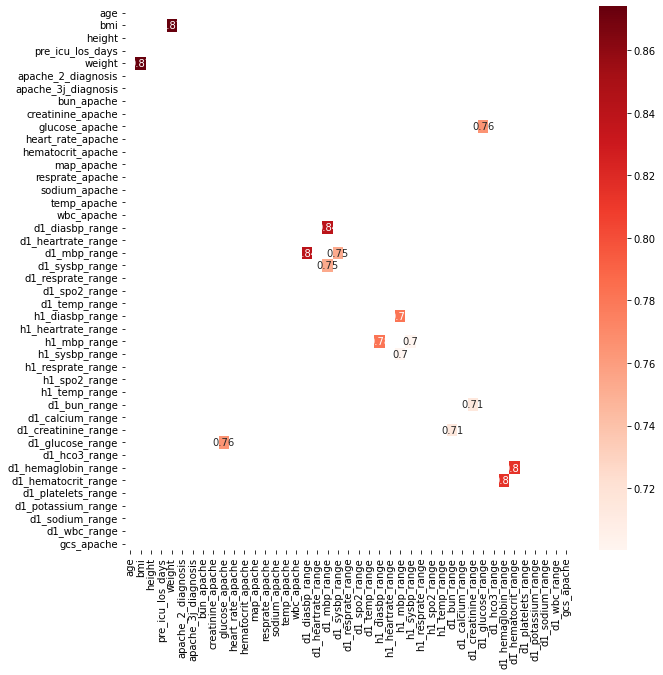

In [327]:
dfCorr = data.corr()
filteredDf = dfCorr[((dfCorr >= 0.7) | (dfCorr <= -0.7)) & (dfCorr !=1.000)]
plt.figure(figsize=(10,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

- weight and bmi are highly correlated. As bmi is a holistic index , weight can be dropped

In [328]:
data.drop('weight',axis=1,inplace=True)

- 24 hours diastolic blood pressure and systolic blood pressure are highly correlated with mean blood pressure. As mean blood pressure range represents both the parameters, we can drop diastolic bp and systolic bp

In [329]:
data['d1_diasbp_range'].corr(data['d1_mbp_range'])

0.839983274931381

In [330]:
data['d1_sysbp_range'].corr(data['d1_mbp_range'])

0.7530297016934014

In [331]:
data['d1_sysbp_range'].corr(data['d1_diasbp_range'])

0.6894798864269277

In [332]:
data.drop(['d1_diasbp_range','d1_sysbp_range'],axis=1,inplace=True)

- Similarly, first hour diastolic blood pressure and systolic blood pressure are highly correlated with mean blood pressure. As mean blood pressure range represents both the parameters, we can drop diastolic bp and systolic bp

In [333]:
data['h1_diasbp_range'].corr(data['h1_mbp_range'])

0.7815780035276659

In [334]:
data['h1_sysbp_range'].corr(data['h1_mbp_range'])

0.700248341581199

In [335]:
data['h1_sysbp_range'].corr(data['h1_diasbp_range'])

0.6910114120202957

In [336]:
data.drop('h1_diasbp_range',axis=1,inplace=True)

In [337]:
data.drop('h1_sysbp_range',axis=1,inplace=True)

- 24 hour glucose range is highly correlated with glucose apache value which is a glucose measure in general. As such d1_glucose_range can be dropped

In [338]:
data['d1_glucose_range'].corr(data['glucose_apache'])

0.7644917204213142

In [339]:
data.drop('d1_glucose_range',axis=1,inplace=True)

- hemaglobin and hematocrit are highly correlated. Since, hemaglobin is a critical measure, hematocrit can be dropped

In [340]:
data['d1_hemaglobin_range'].corr(data['d1_hematocrit_range'])

0.8144527458685187

In [341]:
data.drop('d1_hematocrit_range',axis=1,inplace=True)

In [342]:
data['d1_bun_range'].corr(data['d1_creatinine_range'])

0.7140119736139183

- bun range and creatinine range are highly correlated. Creatinine range can be dropped as bun is a preferred measure

In [343]:
data.drop('d1_creatinine_range',axis=1,inplace=True)

In [344]:
data.describe(include='all')

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_unable_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,d1_heartrate_range,d1_mbp_range,d1_resprate_range,d1_spo2_range,d1_temp_range,h1_heartrate_range,h1_mbp_range,h1_resprate_range,h1_spo2_range,h1_temp_range,d1_bun_range,d1_calcium_range,d1_hco3_range,d1_hemaglobin_range,d1_platelets_range,d1_potassium_range,d1_sodium_range,d1_wbc_range,gcs_apache
count,130157.000000,130157.000000,130157.0,130157,130157,130157.000000,130157,130157,130157,130157,130157.000000,130157.000000,130157.000000,130157.0,130157.0,130157.000000,130157.000000,130157.0,130157.000000,130157.000000,130157.000000,130157.0,130157.000000,130157.000000,130157.000000,130157.000000,130157.0,130157.000000,130157.0,130157.0,130157.0,130157.0,130157.0,130157.0,130157.0,130157.0,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
unique,NaN,NaN,2.0,6,2,NaN,15,5,3,8,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,0.0,Caucasian,M,NaN,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,105448.0,101823,70584,NaN,84456,77086,124741,71468,NaN,NaN,NaN,103200.0,126513.0,NaN,NaN,128676.0,NaN,NaN,NaN,109771.0,NaN,NaN,NaN,NaN,87149.0,NaN,130023.0,128064.0,128387.0,126816.0,129206.0,129612.0,127443.0,102006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,61.995103,29.109376,NaN,NaN,NaN,169.606023,NaN,NaN,NaN,NaN,0.839933,184.670713,564.951073,NaN,NaN,25.663558,1.478160,NaN,158.738286,99.854530,32.975817,NaN,87.193046,25.150603,137.945260,36.420638,NaN,12.187662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.888264,39.875060,16.028546,8.910017,1.034736,8.667608,12.440891,5.459286,2.842384,0.108632,2.018484,0.214868,1.260528,0.558319,10.976186,0.323797,1.457175,1.241106,13.003321
std,16.497377,8.120579,NaN,NaN,NaN,10.787654,NaN,NaN,NaN,NaN,2.485337,85.602060,465.132980,NaN,NaN,18.602286,1.390411,NaN,85.767597,30.722971,6.091659,NaN,41.840437,14.978021,4.778222,0.835521,NaN,6.095917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.487259,22.869415,11.496210,10.120881,0.881634,11.165373,15.108093,6.190571,5.522988,0.357667,5.083587,0.416184,2.666726,0.993565,22.863326,0.507432,2.719188,2.569627,3.402293
min,0.000000,14.844926,NaN,NaN,NaN,137.200000,NaN,NaN,NaN,NaN,-0.250000,101.000000,0.010000,NaN,NaN,4.000000,0.300000,NaN,39.000000,30.000000,16.200000,NaN,40.000000,4.000000,117.000000,32.100000,NaN,0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.000000,-52.000000,-11.000000,0.000000,-2.700000,-98.000000,-89.000000,-130.000000,0.000000,-5.900000,-109.090000,-4.100000,-27.000000,-9.900000,-530.450000,-3.000000,-30.000000,0.000000,3.000000
25%,53.000000,23.737886,NaN,NaN,NaN,162.500000,NaN,NaN,NaN,NaN,0.045833,113.000000,206.010000,NaN,NaN,14.000000,0.780000,NaN,99.000000,87.000000,29.500000,NaN,54.000000,11.000000,136.000000,36.200000,NaN,8.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,25.000000,9.000000,4.000000,0.500000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
50%,63.000000,27.887976,NaN,Na

In [345]:
data.shape

(130157, 55)

## Exploratory Data Analysis

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

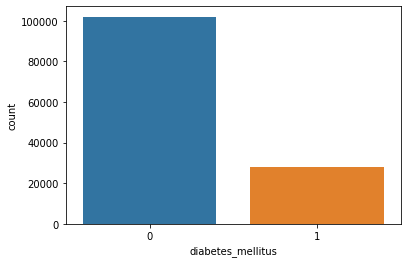

In [346]:
sns.countplot(data['diabetes_mellitus'])  ##imbalanced data

<AxesSubplot:xlabel='age', ylabel='Count'>

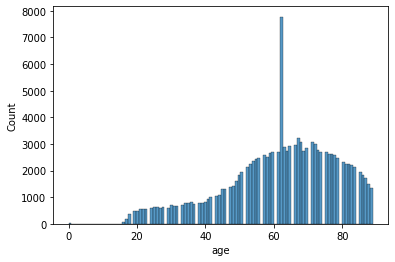

In [347]:
sns.histplot(data['age'])

<AxesSubplot:xlabel='age', ylabel='diabetes_mellitus'>

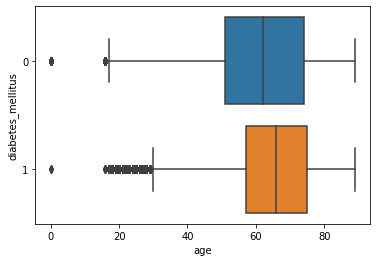

In [348]:
sns.boxplot(x=data['age'],y=data['diabetes_mellitus'])  ##age has outliers and the median age for those with positive diabetes is more

<AxesSubplot:xlabel='bmi', ylabel='Count'>

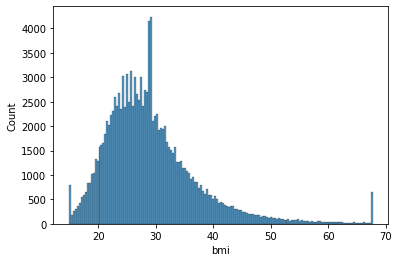

In [349]:
sns.histplot(data['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='diabetes_mellitus'>

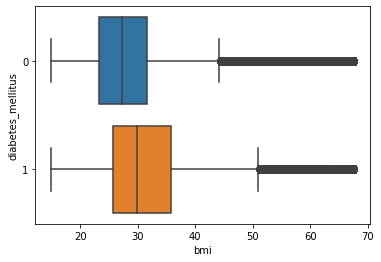

In [350]:
sns.boxplot(x=data['bmi'],y=data['diabetes_mellitus']) ##higher for diabetes positives

<AxesSubplot:xlabel='elective_surgery', ylabel='count'>

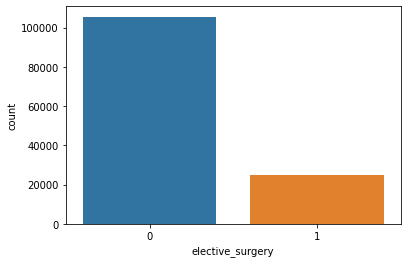

In [351]:
sns.countplot(data['elective_surgery'])  ##most of the patients are not admitted for surgery

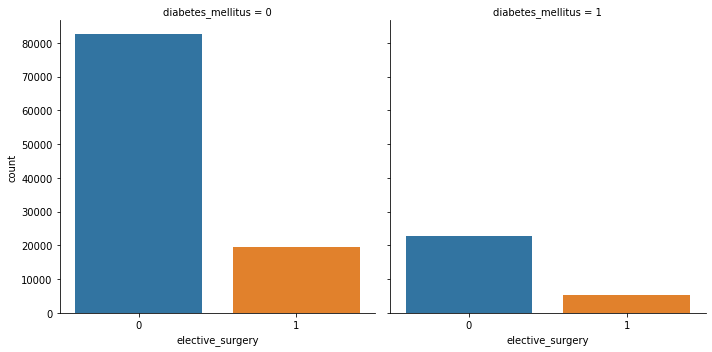

In [352]:
sns.catplot(x='elective_surgery',col='diabetes_mellitus',kind="count",data=data)

In [353]:
pd.crosstab(index=data.elective_surgery,columns=data.diabetes_mellitus)

diabetes_mellitus,0,1
elective_surgery,,
0,82538,22910
1,19468,5241


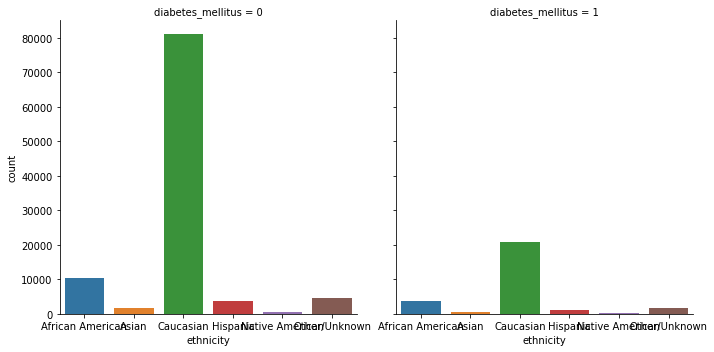

In [354]:
sns.catplot(x='ethnicity',col='diabetes_mellitus',kind="count",data=data)  ##most of the patients are of caucasian origin

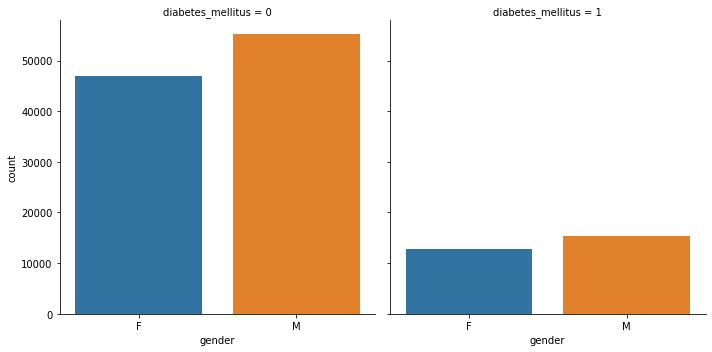

In [355]:
sns.catplot('gender',col='diabetes_mellitus',kind="count",data=data)  ##not very uneven across gender

<AxesSubplot:xlabel='height', ylabel='Count'>

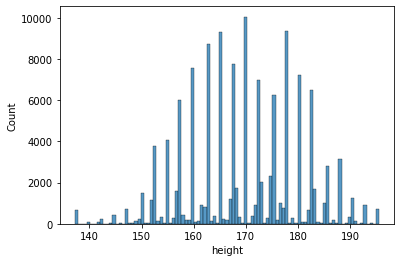

In [356]:
sns.histplot(data['height'])

<AxesSubplot:xlabel='height', ylabel='diabetes_mellitus'>

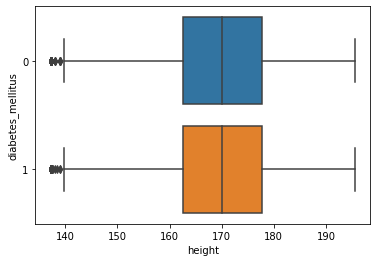

In [357]:
sns.boxplot(x=data['height'],y=data['diabetes_mellitus'])

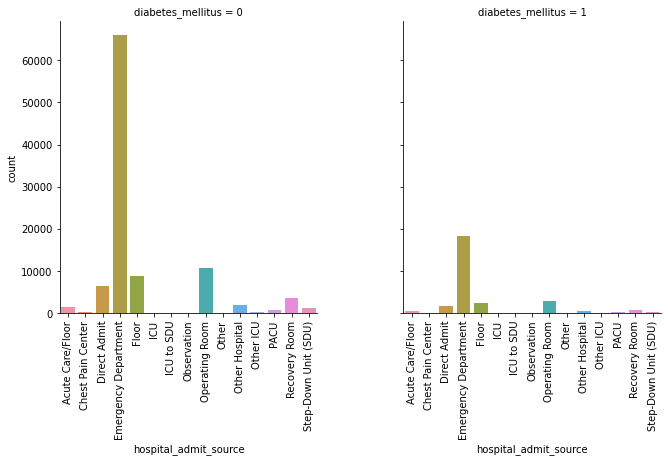

In [358]:
g=sns.catplot(x='hospital_admit_source',col='diabetes_mellitus',kind="count",data=data)  ##most of the patients are of emergency dept admissions
g.set_xticklabels(rotation=90)
plt.show()

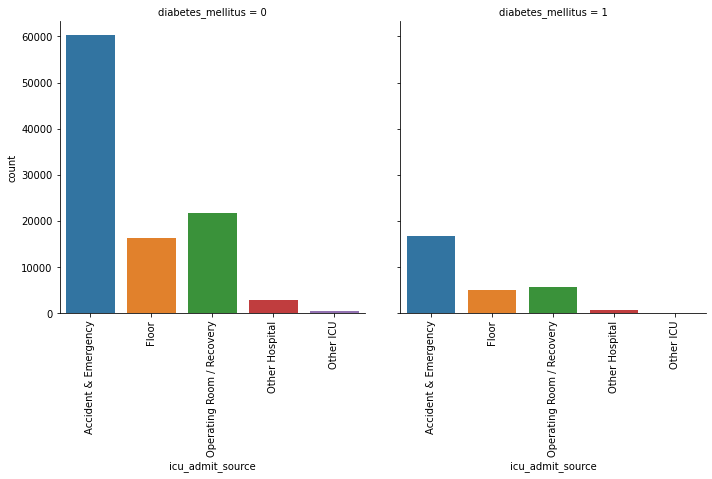

In [359]:
g=sns.catplot(x='icu_admit_source',col='diabetes_mellitus',kind="count",data=data)  ##accident and emergency icu admissions are more
g.set_xticklabels(rotation = 90)

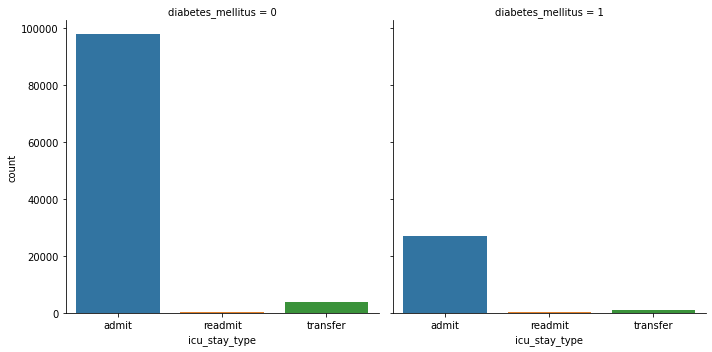

In [360]:
sns.catplot(x='icu_stay_type',col='diabetes_mellitus',kind="count",data=data)  ##most of the patients are admit type

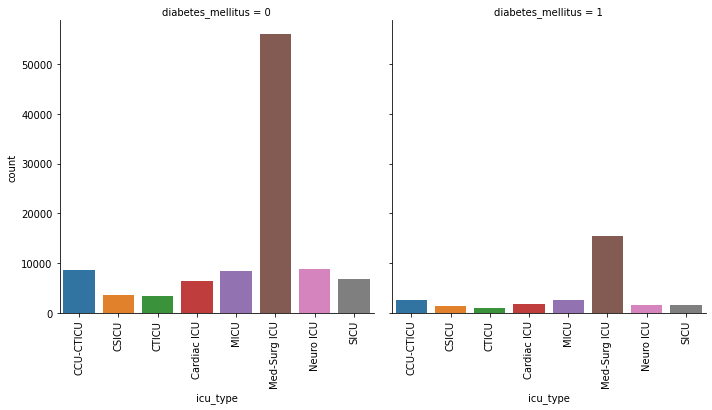

In [361]:
g=sns.catplot(x="icu_type",col="diabetes_mellitus",kind="count",data=data)  ##med-surg icu patients are more
g.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='pre_icu_los_days'>

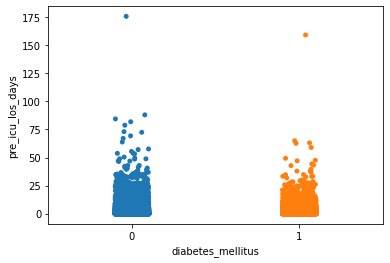

In [362]:
sns.stripplot(x=data.diabetes_mellitus,y=data.pre_icu_los_days)

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='pre_icu_los_days'>

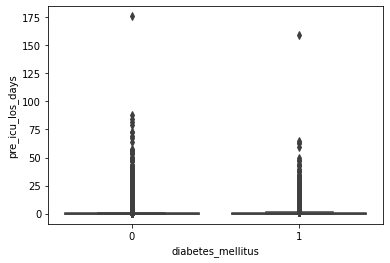

In [363]:
sns.boxplot(data.diabetes_mellitus,data.pre_icu_los_days)

<AxesSubplot:xlabel='apache_2_diagnosis', ylabel='diabetes_mellitus'>

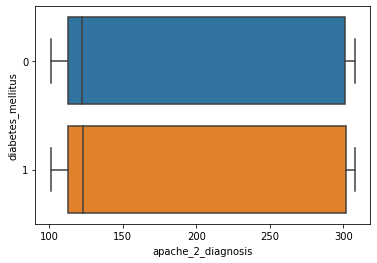

In [364]:
sns.boxplot(x=data.apache_2_diagnosis,y=data.diabetes_mellitus)

<AxesSubplot:xlabel='apache_2_diagnosis', ylabel='Count'>

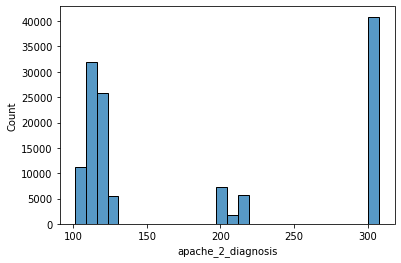

In [365]:
sns.histplot(data.apache_2_diagnosis)

<AxesSubplot:xlabel='apache_3j_diagnosis', ylabel='diabetes_mellitus'>

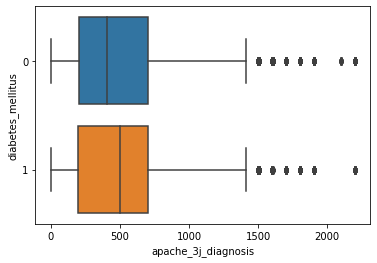

In [366]:
sns.boxplot(x=data.apache_3j_diagnosis,y=data.diabetes_mellitus) ##apache 3 score is slightly higher for positive cases

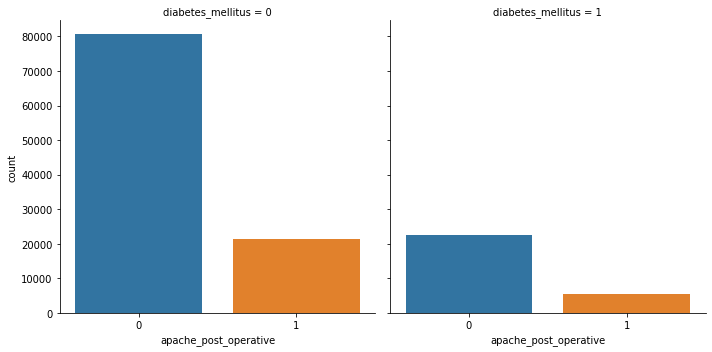

In [367]:
sns.catplot(x='apache_post_operative',col='diabetes_mellitus',kind='count',data=data)

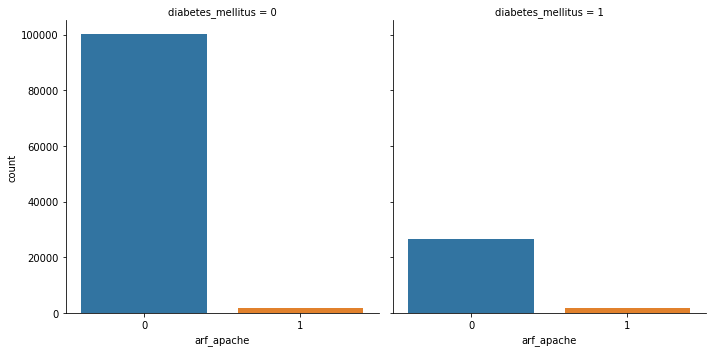

In [368]:
sns.catplot(x='arf_apache',col='diabetes_mellitus',kind='count',data=data)  ##no significant acute renal failure observed with diabetes

<AxesSubplot:xlabel='bun_apache', ylabel='diabetes_mellitus'>

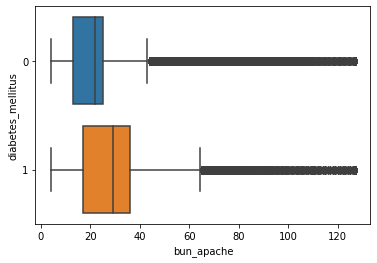

In [369]:
sns.boxplot(x='bun_apache',y='diabetes_mellitus',data=data)  ##many outliers,blood urea nitrogen is more for diabetes positive

<AxesSubplot:xlabel='creatinine_apache', ylabel='diabetes_mellitus'>

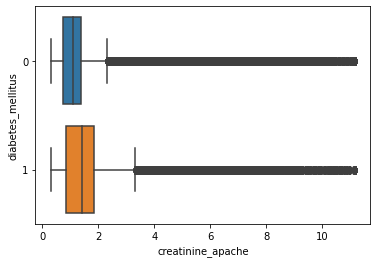

In [370]:
sns.boxplot(x=data['creatinine_apache'],y=data['diabetes_mellitus'])  ##creatinine measure is more for diabetes mellitus

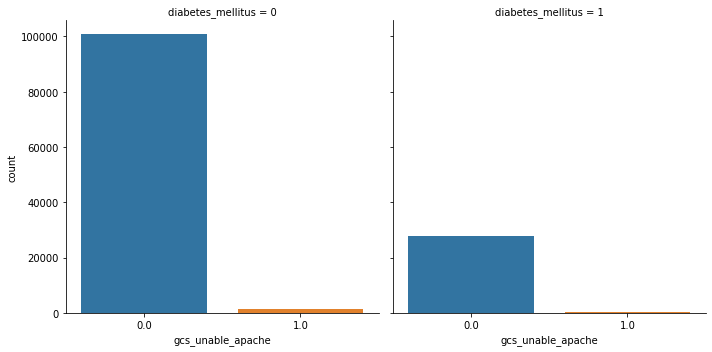

In [371]:
sns.catplot(x='gcs_unable_apache',col='diabetes_mellitus',kind='count',data=data) ##not significant

<AxesSubplot:xlabel='glucose_apache', ylabel='diabetes_mellitus'>

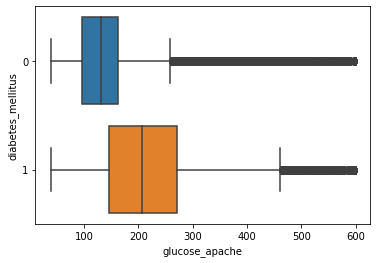

In [372]:
sns.boxplot(x=data['glucose_apache'],y=data['diabetes_mellitus']) ##very significantly higher for diabetes positive cases

<AxesSubplot:xlabel='heart_rate_apache', ylabel='diabetes_mellitus'>

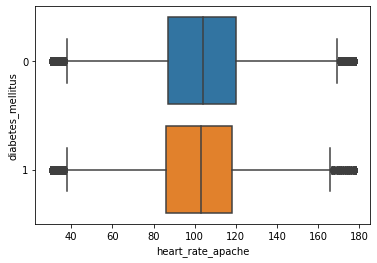

In [373]:
sns.boxplot(x=data['heart_rate_apache'],y=data['diabetes_mellitus']) ##no significant difference

<AxesSubplot:xlabel='hematocrit_apache', ylabel='diabetes_mellitus'>

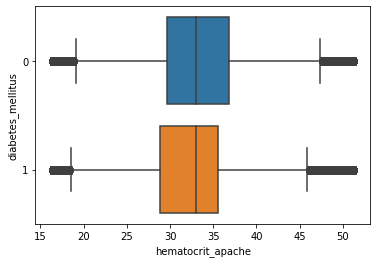

In [374]:
sns.boxplot(x=data['hematocrit_apache'],y=data['diabetes_mellitus']) ##no visible difference

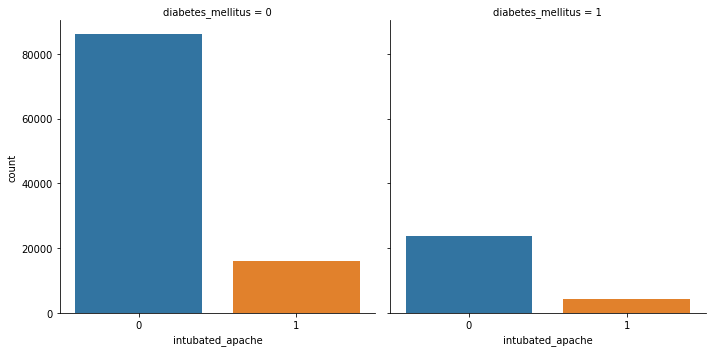

In [375]:
sns.catplot(x='intubated_apache',col='diabetes_mellitus',kind='count',data=data)##even distribution

<AxesSubplot:xlabel='resprate_apache', ylabel='diabetes_mellitus'>

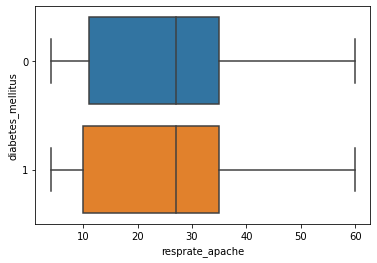

In [376]:
sns.boxplot(x='resprate_apache',y='diabetes_mellitus',data=data)

<AxesSubplot:xlabel='sodium_apache', ylabel='diabetes_mellitus'>

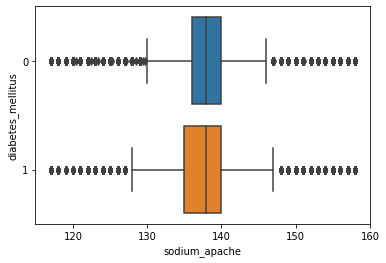

In [377]:
sns.boxplot(x='sodium_apache',y='diabetes_mellitus',data=data)  ##many outliers, no significant difference

<AxesSubplot:xlabel='temp_apache', ylabel='diabetes_mellitus'>

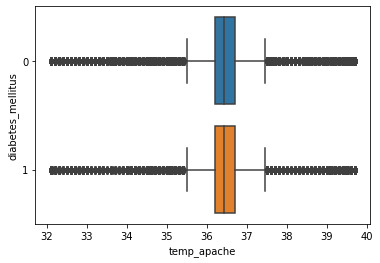

In [378]:
sns.boxplot(x='temp_apache',y='diabetes_mellitus',data=data) ####many outliers, no significant difference

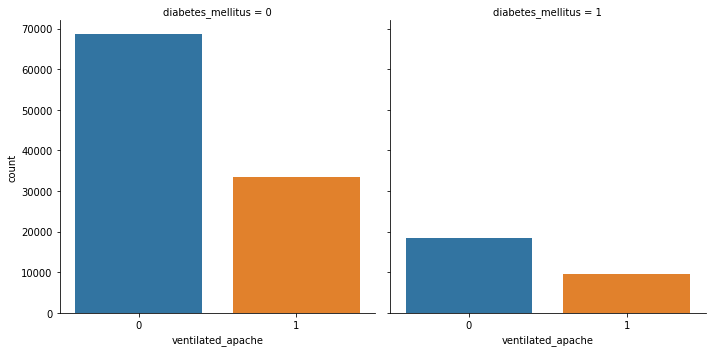

In [379]:
sns.catplot(x='ventilated_apache',col='diabetes_mellitus',kind='count',data=data)  ##even distribution

<AxesSubplot:xlabel='wbc_apache', ylabel='diabetes_mellitus'>

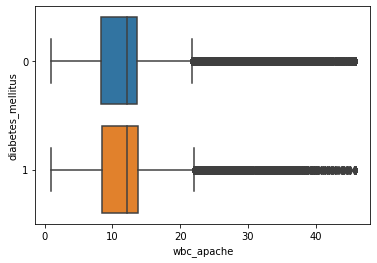

In [380]:
sns.boxplot(x='wbc_apache',y='diabetes_mellitus',data=data) ####many outliers, no significant difference

<AxesSubplot:xlabel='map_apache', ylabel='diabetes_mellitus'>

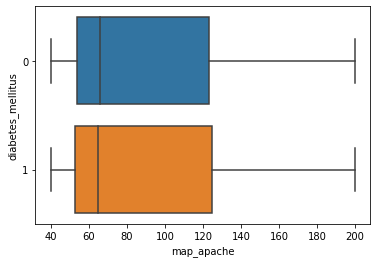

In [381]:
sns.boxplot(pd.to_numeric(data['map_apache']),data['diabetes_mellitus'])  ##no significant diff in mean arerial pressure

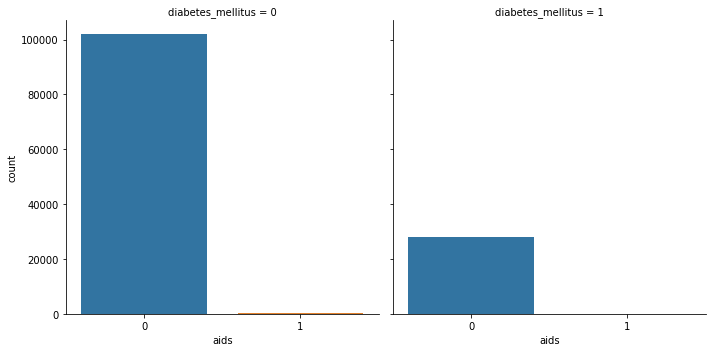

In [382]:
sns.catplot(x='aids',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

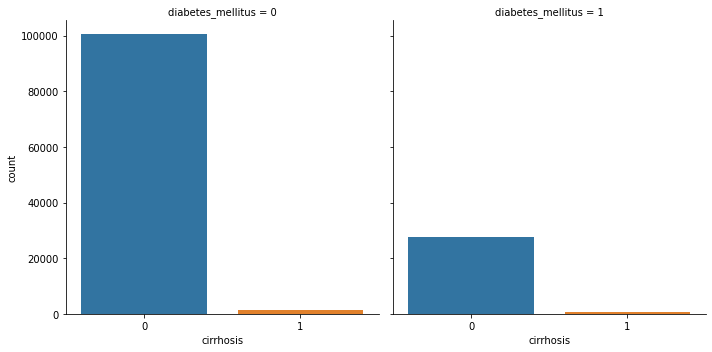

In [383]:
sns.catplot(x='cirrhosis',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

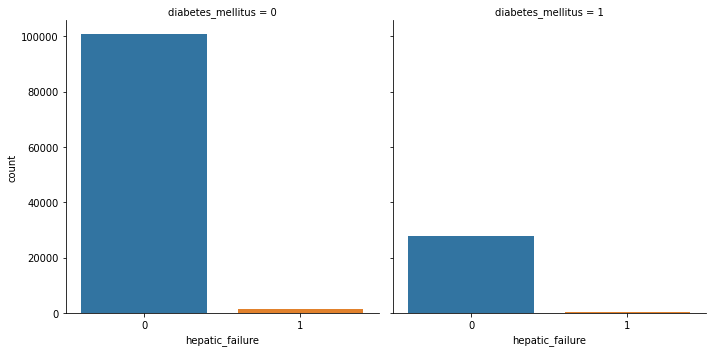

In [384]:
sns.catplot(x='hepatic_failure',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

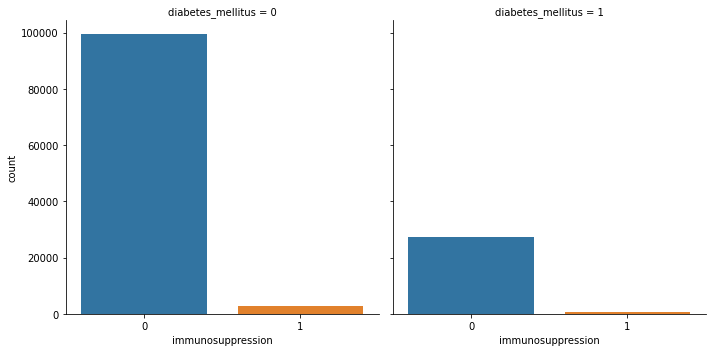

In [385]:
sns.catplot(x='immunosuppression',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

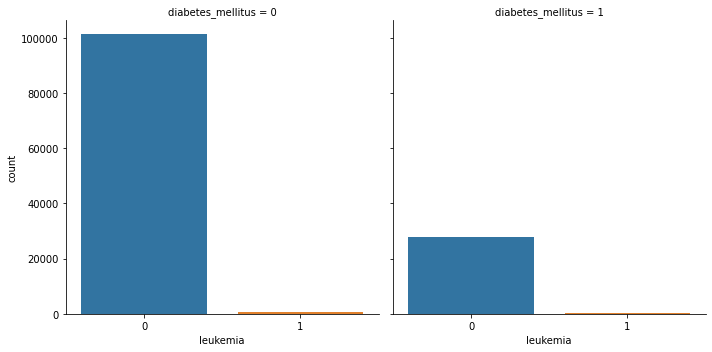

In [386]:
sns.catplot(x='leukemia',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

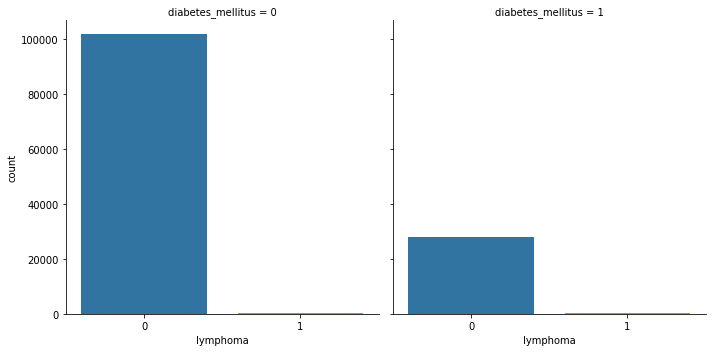

In [387]:
sns.catplot(x='lymphoma',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

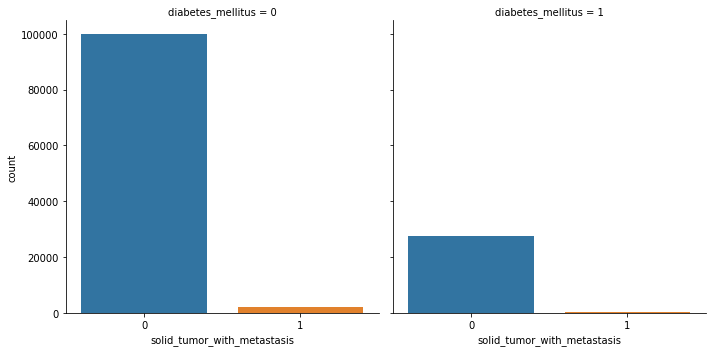

In [388]:
sns.catplot(x='solid_tumor_with_metastasis',col='diabetes_mellitus',kind='count',data=data)  ##even distribution, no significant difference

<AxesSubplot:xlabel='d1_heartrate_range', ylabel='diabetes_mellitus'>

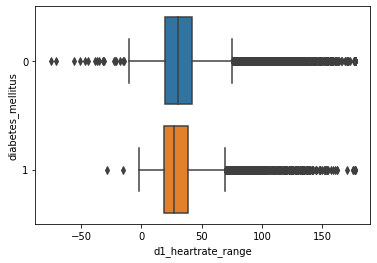

In [389]:
sns.boxplot(data['d1_heartrate_range'],data['diabetes_mellitus']) ##positive diabetes cases have slightly less heart rate,many outliers

<AxesSubplot:xlabel='d1_mbp_range', ylabel='diabetes_mellitus'>

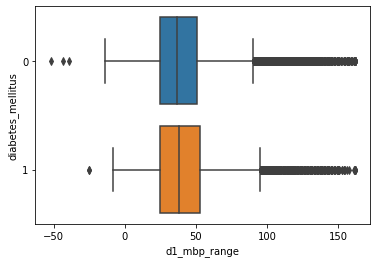

In [390]:
sns.boxplot(data['d1_mbp_range'],data['diabetes_mellitus']) ##many outliers, very slight high mbp range for positive cases

<AxesSubplot:xlabel='d1_resprate_range', ylabel='diabetes_mellitus'>

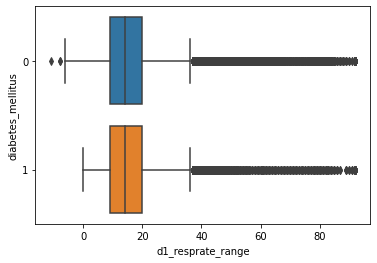

In [391]:
sns.boxplot(data['d1_resprate_range'],data['diabetes_mellitus'])##no significant difference

<AxesSubplot:xlabel='d1_spo2_range', ylabel='diabetes_mellitus'>

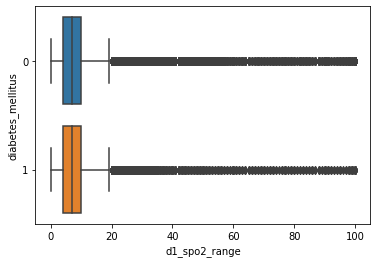

In [392]:
sns.boxplot(data['d1_spo2_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='d1_temp_range', ylabel='diabetes_mellitus'>

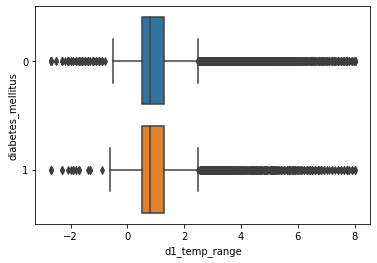

In [393]:
sns.boxplot(data['d1_temp_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='h1_heartrate_range', ylabel='diabetes_mellitus'>

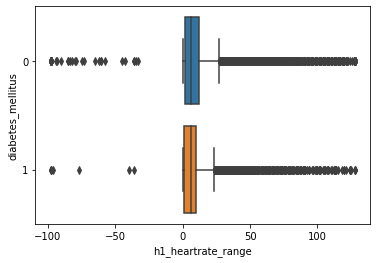

In [394]:
sns.boxplot(data['h1_heartrate_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='h1_mbp_range', ylabel='diabetes_mellitus'>

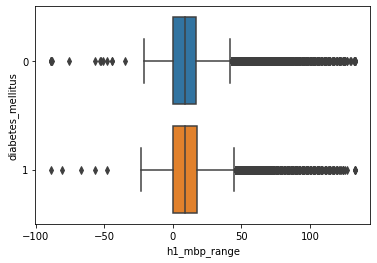

In [395]:
sns.boxplot(data['h1_mbp_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='h1_resprate_range', ylabel='diabetes_mellitus'>

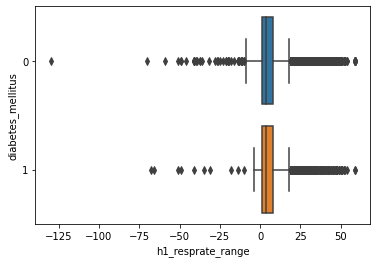

In [396]:
sns.boxplot(data['h1_resprate_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='h1_spo2_range', ylabel='diabetes_mellitus'>

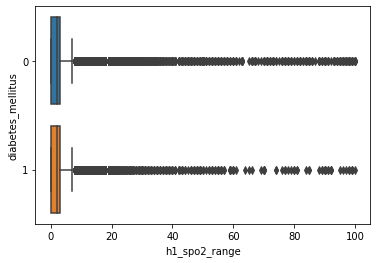

In [397]:
sns.boxplot(data['h1_spo2_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='h1_temp_range', ylabel='diabetes_mellitus'>

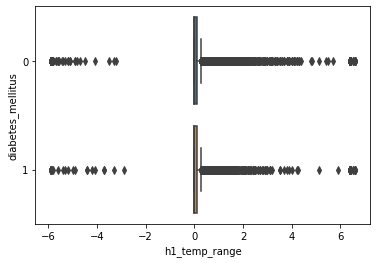

In [398]:
sns.boxplot(data['h1_temp_range'],data['diabetes_mellitus'])  ##no significant difference wrt diabetes

<AxesSubplot:xlabel='d1_bun_range', ylabel='diabetes_mellitus'>

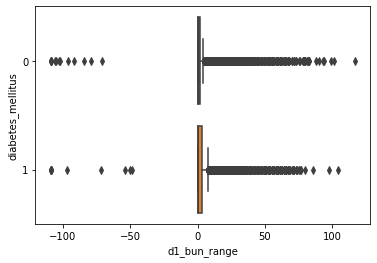

In [399]:
sns.boxplot(data['d1_bun_range'],data['diabetes_mellitus'])  ##higher for positive diabetes cases

<AxesSubplot:xlabel='d1_calcium_range', ylabel='diabetes_mellitus'>

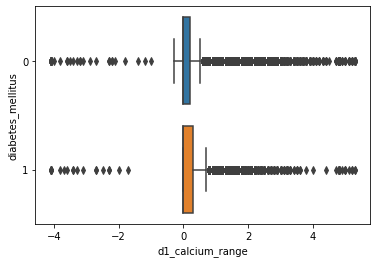

In [400]:
sns.boxplot(data['d1_calcium_range'],data['diabetes_mellitus']) ##higher for positive diabetes cases

<AxesSubplot:xlabel='d1_hco3_range', ylabel='diabetes_mellitus'>

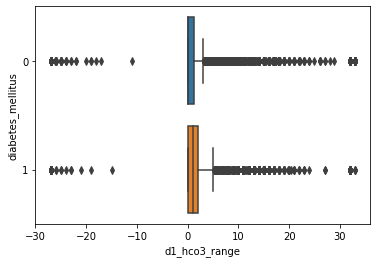

In [401]:
sns.boxplot(data['d1_hco3_range'],data['diabetes_mellitus'])  ##higher for diabetes positive cases

<AxesSubplot:xlabel='d1_hemaglobin_range', ylabel='diabetes_mellitus'>

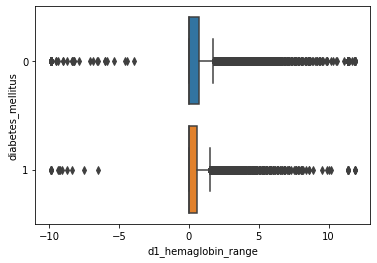

In [402]:
sns.boxplot(data['d1_hemaglobin_range'],data['diabetes_mellitus']) ##slightly less for diabetes positive cases

<AxesSubplot:xlabel='d1_platelets_range', ylabel='diabetes_mellitus'>

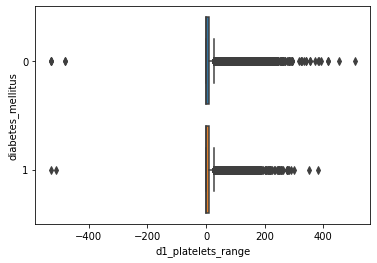

In [403]:
sns.boxplot(data['d1_platelets_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='d1_potassium_range', ylabel='diabetes_mellitus'>

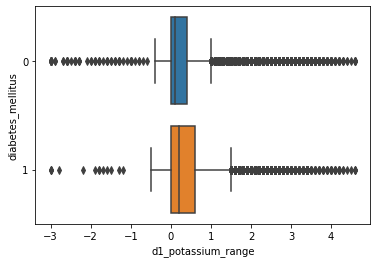

In [404]:
sns.boxplot(data['d1_potassium_range'],data['diabetes_mellitus']) ##higher for diabetes positives

<AxesSubplot:xlabel='d1_sodium_range', ylabel='diabetes_mellitus'>

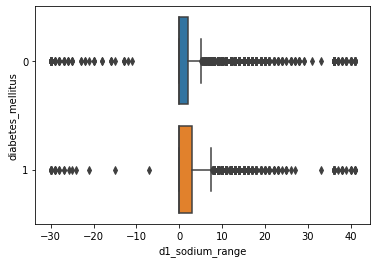

In [405]:
sns.boxplot(data['d1_sodium_range'],data['diabetes_mellitus'])  ##higher for diabetes positives

<AxesSubplot:xlabel='d1_wbc_range', ylabel='diabetes_mellitus'>

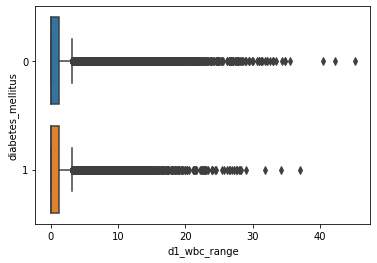

In [406]:
sns.boxplot(data['d1_wbc_range'],data['diabetes_mellitus'])  ##no significant difference

<AxesSubplot:xlabel='gcs_apache', ylabel='diabetes_mellitus'>

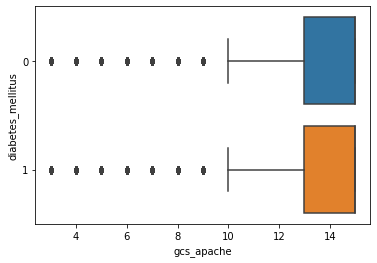

In [407]:
sns.boxplot(data['gcs_apache'],data['diabetes_mellitus'])  ##no sognificant difference

-  from EDA, age, bmi, apache_3j_diagnosis, bun_apache,creatinine_apache, glucose_apache,d1_bun_range, d1_calcium_range, d1_hco3_range, d1_potassiumn_range and d1_sodium range seem to vary with diabetes positive cases

In [621]:
## Train-Test splitting data
X = data.drop(['diabetes_mellitus'],axis=1)
y = data['diabetes_mellitus']
seed = 10
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =seed,stratify=y)

In [622]:
X_train.shape

(91109, 54)

In [623]:
X_test.shape

(39048, 54)

In [624]:
y_train.shape

(91109,)

In [625]:
y_test.shape

(39048,)

## Outlier Treatment

In [626]:
X_train_num = X_train.select_dtypes('float64')
X_test_num = X_test.select_dtypes('float64')

In [627]:
X_train_category = X_train.select_dtypes('category')
X_test_category = X_test.select_dtypes('category')

In [628]:
len(X_train_num.columns)

35

In [629]:
len(X_train_category.columns)

19

In [630]:
q1 = X_train_num.quantile(0.25)
q3 = X_train_num.quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [631]:
##capping outliers in train data
for col in X_train_num.columns:
    X_train_num[col] = np.where(X_train_num[col] > upper_limit[col],upper_limit[col],np.where(X_train_num[col] < lower_limit[col],
                                    lower_limit[col],X_train_num[col]))

In [632]:
##applying same limits on test data
for col in X_test_num.columns:
    X_test_num[col] = np.where(X_test_num[col] > upper_limit[col],upper_limit[col],np.where(X_test_num[col] < lower_limit[col],
                                    lower_limit[col],X_test_num[col]))

## Checking for Multicollinearity among numerical variables using VIF

In [633]:
import statsmodels.formula.api as smf

def vif_cal(df):
    x_vars=df
    xvar_names= df.columns
    
    for i in range(0,len(xvar_names)):
        y=x_vars[xvar_names[i]]
        x= x_vars[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula ='y~x',data=x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ", vif)

In [634]:
vif_cal(X_train_num)

age VIF =  1.2
bmi VIF =  1.08
height VIF =  1.06
pre_icu_los_days VIF =  1.11
apache_2_diagnosis VIF =  1.24
apache_3j_diagnosis VIF =  1.38
bun_apache VIF =  2.93
creatinine_apache VIF =  2.62
glucose_apache VIF =  1.13
heart_rate_apache VIF =  1.36
hematocrit_apache VIF =  1.3
map_apache VIF =  1.11
resprate_apache VIF =  1.34
sodium_apache VIF =  1.08
temp_apache VIF =  1.16
wbc_apache VIF =  1.15
d1_heartrate_range VIF =  1.7
d1_mbp_range VIF =  1.51
d1_resprate_range VIF =  1.72
d1_spo2_range VIF =  1.45
d1_temp_range VIF =  1.38
h1_heartrate_range VIF =  1.57
h1_mbp_range VIF =  1.43
h1_resprate_range VIF =  1.55
h1_spo2_range VIF =  1.43
h1_temp_range VIF =  1.11
d1_bun_range VIF =  2.54
d1_calcium_range VIF =  2.47
d1_hco3_range VIF =  2.45
d1_hemaglobin_range VIF =  2.09
d1_platelets_range VIF =  2.72
d1_potassium_range VIF =  2.01
d1_sodium_range VIF =  2.27
d1_wbc_range VIF =  2.74
gcs_apache VIF =  1.17


- All vif values are less than 3. so, the columns are not affected by multicollinearity

## scaling numerical data

In [635]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

## One Hot Encoding of Categorical Data

In [423]:
X_train_category.head()

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
34075,0,African American,F,Floor,Floor,admit,Cardiac ICU,0,1,0.0,0,0,0,0,0,0,0,0,0
53155,0,African American,M,Emergency Department,Accident & Emergency,admit,MICU,0,0,0.0,0,0,0,0,0,0,0,0,0
36718,0,Caucasian,F,Emergency Department,Accident & Emergency,transfer,MICU,0,0,0.0,0,0,0,0,0,0,0,0,0
80121,0,Caucasian,M,Emergency Department,Accident & Emergency,transfer,Med-Surg ICU,0,0,0.0,0,0,0,0,0,0,0,0,0
21257,0,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,0,0,0,0,0,0,0,0,0


In [636]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_category['gender']= le.fit_transform(X_train_category['gender'])
X_test_category['gender'] = le.transform(X_test_category['gender'])

In [425]:
X_train_category.head()  ## F is coded as 0 and M is coded as 1

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
34075,0,African American,0,Floor,Floor,admit,Cardiac ICU,0,1,0.0,0,0,0,0,0,0,0,0,0
53155,0,African American,1,Emergency Department,Accident & Emergency,admit,MICU,0,0,0.0,0,0,0,0,0,0,0,0,0
36718,0,Caucasian,0,Emergency Department,Accident & Emergency,transfer,MICU,0,0,0.0,0,0,0,0,0,0,0,0,0
80121,0,Caucasian,1,Emergency Department,Accident & Emergency,transfer,Med-Surg ICU,0,0,0.0,0,0,0,0,0,0,0,0,0
21257,0,Caucasian,1,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,0,0,0,0,0,0,0,0,0


- Most of the variables are binary coded. Few variables need to be encoded

In [637]:
X_train_category= pd.get_dummies(X_train_category,columns=['ethnicity','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type'],
                                drop_first=True)


In [638]:
X_test_category= pd.get_dummies(X_test_category,columns=['ethnicity','hospital_admit_source','icu_admit_source','icu_stay_type','icu_type'],
                                drop_first=True)

In [428]:
type(X_train_category)

pandas.core.frame.DataFrame

In [639]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [640]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [641]:
X_train_scaled.columns = X_train_num.columns
X_test_scaled.columns = X_test_num.columns

In [642]:
X_train_scaled.shape

(91109, 35)

In [643]:
X_train_category.shape

(91109, 46)

In [644]:
X_train_final = pd.concat([X_train_scaled.reset_index(drop=True),X_train_category.reset_index(drop=True)],axis=1)

In [645]:
X_train_final.shape

(91109, 81)

In [436]:
X_train_final.head()

,age,bmi,height,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,temp_apache,wbc_apache,d1_heartrate_range,d1_mbp_range,d1_resprate_range,d1_spo2_range,d1_temp_range,h1_heartrate_range,h1_mbp_range,h1_resprate_range,h1_spo2_range,h1_temp_range,d1_bun_range,d1_calcium_range,d1_hco3_range,d1_hemaglobin_range,d1_platelets_range,d1_potassium_range,d1_sodium_range,d1_wbc_range,gcs_apache,elective_surgery,gender,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,-1.476190,0.812400,-0.492810,0.377289,-0.047872,0.185143,0.6875,1.928571,-0.621775,0.588235,-0.475467,0.928571,0.416667,0.263685,0.158724,1.780063,-0.142857,0.444444,1.454545,-1.166667,1.625000e+00,-0.222222,-0.176471,0.428571,-0.666667,2.5,0.0,0.000000,0.000000,0.166667,0.453626,-0.25,0.0,2.5000,0.0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.047619,-0.121691,-0.333333,0.443223,0.010638,-0.209247,-0.3750,-0.814286,-0.666719,-0.117647,-0.405045,-0.114286,0.250000,0.513685,1.558724,-0.775493,-0.476190,-0.814815,0.909091,-0.833333,-2.500000e-01,-0.222222,-0.529412,0.857143,-0.333333,0.0,2.0,0.413641,0.793319,0.666667,0.635077,0.25,1.5,1.2086,-0.5,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.523810,0.585721,0.169935,-0.289377,0.005319,0.589493,-0.7500,-1.114286,0.951259,0.264706,0.045660,-0.042857,0.000000,-0.236315,0.958724,1.261544,-0.333333,-0.481481,-0.727273,-0.833333,-3.750000e-01,0.000000,-0.529412,-0.571429,-0.666667,0.0,2.5,1.654564,2.500000,0.000000,0.000000,1.50,2.0,0.0000,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0.190476,0.298228,0.836601,0.159341,-0.021277,0.388455,0.0000,0.171429,0.468112,-1.411765,0.862561,-0.042857,-0.583333,0.513685,-0.641276,0.502285,-0.761905,-0.111111,-0.272727,0.166667,-8.881784e-15,-0.444444,0.882353,-0.571429,0.000000,0.0,0.5,0.413641,2.379956,0.000000,0.000000,2.00,0.5,0.0000,0.0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,-1.285714,0.305147,0.777778,-0.120879,0.000000,0.591546,-0.9375,-0.628571,-0.610539,-1.352941,1.397772,-0.085714,0.125000,0.263685,0.358724,0.613396,-0.238095,0.148148,-0.363636,0.000000,-5.000000e-01,-0.111111,0.058824,0.142857,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.25,0.0,0.0000,-2.5,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [646]:
X_test_final = pd.concat([X_test_scaled.reset_index(drop=True),X_test_category.reset_index(drop=True)],axis=1)

In [647]:
df = X_train_final
df_test = X_test_final

In [648]:
from sklearn.feature_selection import SelectKBest,chi2

In [440]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_category, y_train)
X_train_fs = fs.transform(X_train_category)
X_test_fs = fs.transform(X_test_category)


In [441]:
pd.DataFrame(np.round(fs.pvalues_,2),fs.get_feature_names_out())

,0
elective_surgery,0.07
gender,0.27
apache_post_operative,0.00
arf_apache,0.00
gcs_unable_apache,0.00
intubated_apache,0.54
ventilated_apache,0.00
aids,0.00
cirrhosis,0.00
hepatic_failure,0.08


In [442]:
pd.DataFrame(np.round(fs.scores_,2),fs.get_feature_names_out())

,0
elective_surgery,3.35
gender,1.22
apache_post_operative,11.77
arf_apache,1031.55
gcs_unable_apache,15.81
intubated_apache,0.37
ventilated_apache,8.02
aids,8.73
cirrhosis,15.11
hepatic_failure,3.09


- <b>From chi square test, most of the hospital admit source categories,lymphoma,leukamia, immunosuppression,intubated_apache,gender,hepatic_failure etc are insignificant</b>

## Balancing the training dataset 

In [443]:
y_train.value_counts(normalize=True)  ##78% of the data belongs to negative class

0    0.78371
1    0.21629
Name: diabetes_mellitus, dtype: float64

In [444]:
y_test.value_counts(normalize=True)

0    0.783728
1    0.216272
Name: diabetes_mellitus, dtype: float64

In [649]:
from imblearn.over_sampling import SMOTE
seed =10
k = 3
sm= SMOTE(sampling_strategy = 'auto',k_neighbors =k,random_state = seed)
X_res,y_res = sm.fit_resample(df,y_train)

In [650]:
X_res.shape

(142806, 81)

In [651]:
y_res.shape

(142806,)

In [448]:
X_res.isnull().sum()

age                                              0
bmi                                              0
height                                           0
pre_icu_los_days                                 0
apache_2_diagnosis                               0
apache_3j_diagnosis                              0
bun_apache                                       0
creatinine_apache                                0
glucose_apache                                   0
heart_rate_apache                                0
hematocrit_apache                                0
map_apache                                       0
resprate_apache                                  0
sodium_apache                                    0
temp_apache                                      0
wbc_apache                                       0
d1_heartrate_range                               0
d1_mbp_range                                     0
d1_resprate_range                                0
d1_spo2_range                  

In [652]:
null_indices = X_res.dropna() 

In [653]:
null_indices.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            142791, 142792, 142793, 142795, 142796, 142797, 142798, 142800,
            142803, 142805],
           dtype='int64', length=122918)

In [654]:
X_res= X_res[X_res.index.isin(null_indices.index)]  ##dropping the null values that were created by over sampling

In [655]:
y_res = y_res[y_res.index.isin(null_indices.index)]  ##dropping the null values after oversampling

In [656]:
X_res.shape

(122918, 81)

In [657]:
y_res.shape

(122918,)

In [658]:
y_res.value_counts(normalize=True)  

0    0.580899
1    0.419101
Name: diabetes_mellitus, dtype: float64

## Dataset is not highly imbalanced anymore and can be used for modelling

In [457]:
import statsmodels.api as sm
logit_model = sm.Logit(y_res,sm.add_constant(X_res))
results = logit_model.fit(maxiter=100)
print(results.summary())

         Current function value: 0.464442
         Iterations: 100


C:\Users\Shara\Anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:      diabetes_mellitus   No. Observations:               122918
Model:                          Logit   Df Residuals:                   122836
Method:                           MLE   Df Model:                           81
Date:                Mon, 24 Jan 2022   Pseudo R-squ.:                  0.3170
Time:                        06:17:03   Log-Likelihood:                -57088.
converged:                      False   LL-Null:                       -83584.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          3.7051      0.051     72.997      0.000       3.606       3.805
age                                

- The model did not converge yet..the p-values of insignificant variables are showing it to be significant. We may try running the regression model based on the variables that are seemingly significant from the EDA

In [659]:
X_res=X_res[['age','bmi','pre_icu_los_days','apache_3j_diagnosis','bun_apache','creatinine_apache','glucose_apache','sodium_apache',
            'd1_heartrate_range','d1_bun_range','d1_calcium_range','d1_hco3_range','d1_hemaglobin_range','d1_potassium_range',
            'd1_sodium_range','apache_post_operative','arf_apache','gcs_unable_apache','ventilated_apache','cirrhosis','aids',
            'solid_tumor_with_metastasis','ethnicity_Asian','ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
            'ethnicity_Other/Unknown','hospital_admit_source_Other Hospital','hospital_admit_source_Other ICU','hospital_admit_source_Recovery Room',
            'hospital_admit_source_Step-Down Unit (SDU)','icu_admit_source_Floor','icu_admit_source_Operating Room / Recovery',
            'icu_admit_source_Other Hospital','icu_admit_source_Other ICU','icu_stay_type_readmit','icu_stay_type_transfer',
            'icu_type_CSICU','icu_type_CTICU','icu_type_MICU','icu_type_Neuro ICU','icu_type_SICU']]

In [459]:
logit_model = sm.Logit(y_res,sm.add_constant(X_res))
results = logit_model.fit(maxiter=100)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.510642
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      diabetes_mellitus   No. Observations:               122918
Model:                          Logit   Df Residuals:                   122875
Method:                           MLE   Df Model:                           42
Date:                Mon, 24 Jan 2022   Pseudo R-squ.:                  0.2491
Time:                        06:20:34   Log-Likelihood:                -62767.
converged:                       True   LL-Null:                       -83584.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       

- Variables icu_type_CSICU,hospital_admit_source_Other Hospital are having high p values and can be dropped

In [660]:
X_res.drop(['icu_type_CSICU','hospital_admit_source_Other Hospital'],axis=1,inplace=True)

In [661]:
df_test=df_test[['age','bmi','pre_icu_los_days','apache_3j_diagnosis','bun_apache','creatinine_apache','glucose_apache','sodium_apache',
            'd1_heartrate_range','d1_bun_range','d1_calcium_range','d1_hco3_range','d1_hemaglobin_range','d1_potassium_range',
            'd1_sodium_range','apache_post_operative','arf_apache','gcs_unable_apache','ventilated_apache','cirrhosis','aids',
            'solid_tumor_with_metastasis','ethnicity_Asian','ethnicity_Caucasian','ethnicity_Hispanic','ethnicity_Native American',
            'ethnicity_Other/Unknown','hospital_admit_source_Other ICU','hospital_admit_source_Recovery Room',
            'hospital_admit_source_Step-Down Unit (SDU)','icu_admit_source_Floor','icu_admit_source_Operating Room / Recovery',
            'icu_admit_source_Other Hospital','icu_admit_source_Other ICU','icu_stay_type_readmit','icu_stay_type_transfer',
             'icu_type_CTICU','icu_type_MICU','icu_type_Neuro ICU','icu_type_SICU']]

In [462]:
logit_model2 = sm.Logit(y_res,sm.add_constant(X_res))
results2 = logit_model2.fit(maxiter=100)
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.510645
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      diabetes_mellitus   No. Observations:               122918
Model:                          Logit   Df Residuals:                   122877
Method:                           MLE   Df Model:                           40
Date:                Mon, 24 Jan 2022   Pseudo R-squ.:                  0.2491
Time:                        06:23:02   Log-Likelihood:                -62767.
converged:                       True   LL-Null:                       -83584.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       

In [464]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score

In [465]:
y_train_pred = results2.predict(sm.add_constant(X_res))

In [466]:
y_pred = results2.predict(sm.add_constant(df_test))

In [467]:
y_train_pred = np.where(y_train_pred>0.5,1,0)
y_pred = np.where(y_pred>0.5,1,0)

In [468]:
confusion_matrix(y_test,y_pred)

array([[25740,  4863],
       [ 3691,  4754]], dtype=int64)

In [476]:
test_acc=np.round(accuracy_score(y_test,y_pred),2)  ##test data acc

In [478]:
train_acc=np.round(accuracy_score(y_res,y_train_pred),2)   ##train data acc

In [479]:
test_prec = np.round(precision_score(y_test,y_pred),2)
train_prec = np.round(precision_score(y_res,y_train_pred),2)

In [480]:
test_recall= np.round(recall_score(y_test,y_pred),2)
train_recall = np.round(recall_score(y_res,y_train_pred),2)

In [481]:
test_f1 = np.round(f1_score(y_test,y_pred),2)
train_f1 = np.round(f1_score(y_test,y_pred),2)

In [482]:
print(f"Train data accuracy : {train_acc} and Test data accuracy : {test_acc}")
print(f"Train data precision : {train_prec} and test data precision : {test_prec}")
print(f"Train data recall : {train_recall} and test data recall : {test_recall}")
print(f"Train data f1_score : {train_f1} and test data recall : {test_f1}")

Train data accuracy : 0.76 and Test data accuracy : 0.78
Train data precision : 0.75 and test data precision : 0.49
Train data recall : 0.65 and test data recall : 0.56
Train data f1_score : 0.53 and test data recall : 0.53


- The base model built with stats models has accuracy score of 78.7 and just approx 50 percent precision and recall on test data. The difference in the values is high between train and test values

In [483]:
from sklearn.linear_model import LogisticRegression

In [484]:
model1 = LogisticRegression(random_state =10,max_iter = 1000)

In [485]:
mod1 = model1.fit(X_res,y_res)

In [486]:
sk_y_pred=mod1.predict(df_test)

In [487]:
confusion_matrix(y_test,sk_y_pred,)

array([[25739,  4864],
       [ 3691,  4754]], dtype=int64)

In [488]:
accuracy_score(y_test,sk_y_pred)

0.7809106740422045

In [489]:
precision_score(y_test,sk_y_pred)

0.4942815554169266

In [490]:
recall_score(y_test,sk_y_pred)

0.5629366489046773

In [491]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     30603
           1       0.49      0.56      0.53      8445

    accuracy                           0.78     39048
   macro avg       0.68      0.70      0.69     39048
weighted avg       0.79      0.78      0.79     39048



- The base model with sklearn is also having same accuracy,precision and recall as that of statsmodel, for probability threshold of 0.5

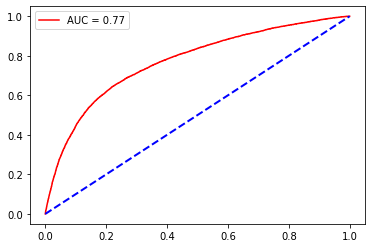

In [492]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve
preds = mod1.predict_proba(df_test)[:,1]   
fpr,tpr,threshold = roc_curve(y_test,preds,drop_intermediate=False)
auc = roc_auc_score(y_test,preds)
plt.figure()
plt.plot(fpr,tpr,'r',label = 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'blue',linestyle ='--',lw =2)
plt.legend(loc = 'best')

In [493]:
precision,recall,threshold = precision_recall_curve(y_test,preds)

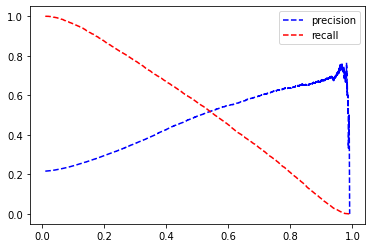

In [494]:
plt.plot(threshold, precision[:-1],"b--",label = "precision")
plt.plot(threshold,recall[:-1],"r--",label = "recall")
plt.legend()

In [495]:
np.where(precision==recall)  ##finding the index at which precison and recall intersect

(array([30561, 39005], dtype=int64),)

In [496]:
threshold[30568]  ##threshold at optimal precision and recall = 0.54 which is almost the default threshold value

0.5411697883367779

## Hyperparameter Tuning of Logistic Regression model

In [497]:
from sklearn.model_selection import GridSearchCV

In [498]:
param_grid = {"C":[0.001,0.01,0.1,10,100,1000],
             "penalty":['l1','l2','elasticnet']}

In [499]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=10)
clf = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid,cv=kfold)

In [500]:
clf.fit(X_res,y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [501]:
clf.best_estimator_

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [502]:
clf.best_params_

{'C': 1000, 'penalty': 'l1'}

In [503]:
clf.best_score_

0.7618086981860296

In [504]:
model_tuned = LogisticRegression(C=100,random_state =10,penalty='l1',solver='liblinear',max_iter = 1000)

In [505]:
mod2= model_tuned.fit(X_res,y_res)

In [506]:
mod2_pred = mod2.predict(df_test)
conf_mtx =confusion_matrix(y_test,mod2_pred)

In [507]:
accuracy_score(y_test,mod2_pred)  ##acc score didnt make any improvement

0.7809618930547019

In [508]:
print("Accuracy:",accuracy_score(y_test, mod2_pred))
print("Precision:",precision_score(y_test, mod2_pred))
print("Recall:",recall_score(y_test, mod2_pred))

Accuracy: 0.7809618930547019
Precision: 0.4943855271366188
Recall: 0.5630550621669627


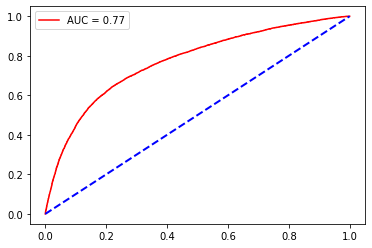

In [509]:
preds = mod2.predict_proba(df_test)[:,1]   
fpr,tpr,threshold = roc_curve(y_test,preds,drop_intermediate=False)
auc = roc_auc_score(y_test,preds)
plt.figure()
plt.plot(fpr,tpr,'r',label = 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'blue',linestyle ='--',lw =2)
plt.legend(loc = 'best')

Text(0.5, 257.44, 'Predicted label')

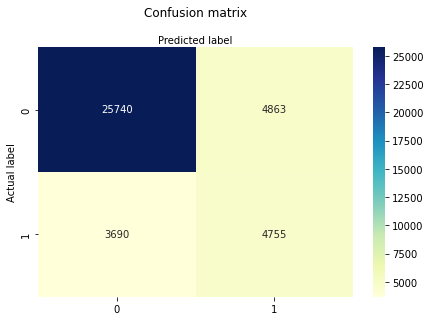

In [510]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mtx), annot=True, cmap="YlGnBu",fmt='g' )
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

- <b>Logistic Regression is not a best model for this data set. We need to explore other models</b>

## Applying PCA for Dimensionality Reduction

In [515]:
from sklearn.decomposition import PCA

In [516]:
pca = PCA()
X_pca = pca.fit_transform(X_res)
X_test_pca = pca.transform(df_test)

Text(0, 0.5, 'cumulative expained variance')

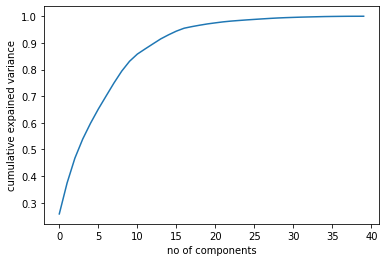

In [517]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no of components")
plt.ylabel('cumulative expained variance')

<BarContainer object of 40 artists>

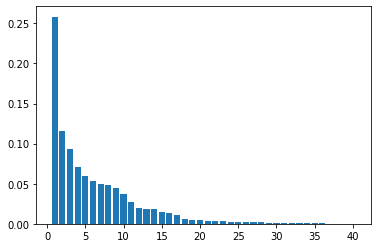

In [518]:
pc = range(1,pca.n_components_+1)
plt.bar(pc,pca.explained_variance_ratio_)

In [519]:
## 15 out of 40 components are explaining almost 95 percent of the variance of the data.
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_res)
X_test_pca = pca.transform(df_test)

In [520]:
model3= LogisticRegression()
pca_mod = model3.fit(X_pca,y_res)

In [521]:
pca_y_pred = pca_mod.predict(X_test_pca)
pca_train_pred = pca_mod.predict(X_pca)

In [522]:
confusion_matrix(y_test,pca_y_pred)

array([[25634,  4969],
       [ 3376,  5069]], dtype=int64)

In [523]:
pca_acc=np.round(accuracy_score(y_test,pca_y_pred),2)
pca_train_acc=np.round(accuracy_score(y_res,pca_train_pred),2)

In [524]:
pca_prec=np.round(precision_score(y_test,pca_y_pred),2)
pca_train_prec=np.round(precision_score(y_res,pca_train_pred),2)

In [525]:
pca_recall=np.round(recall_score(y_test,pca_y_pred),2)
pca_train_recall=np.round(recall_score(y_res,pca_train_pred),2)

In [527]:
pca_f1=np.round(f1_score(y_test,pca_y_pred),2)
pca_train_f1=np.round(f1_score(y_res,pca_train_pred),2)

In [528]:
print(f"Train data accuracy : {pca_train_acc} and Test data accuracy : {pca_acc}")
print(f"Train data precision : {pca_train_prec} and test data precision : {pca_prec}")
print(f"Train data recall : {pca_train_recall} and test data recall : {pca_recall}")
print(f"Train data f1_score : {pca_train_f1} and test data recall : {pca_f1}")

Train data accuracy : 0.75 and Test data accuracy : 0.79
Train data precision : 0.74 and test data precision : 0.5
Train data recall : 0.62 and test data recall : 0.6
Train data f1_score : 0.67 and test data recall : 0.55


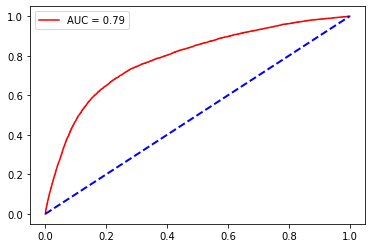

In [529]:
preds = model3.predict_proba(X_test_pca)[:,1]   
fpr,tpr,threshold = roc_curve(y_test,preds,drop_intermediate=False)
auc = roc_auc_score(y_test,preds)
plt.figure()
plt.plot(fpr,tpr,'r',label = 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'blue',linestyle ='--',lw =2)
plt.legend(loc = 'best')

- <b> using PCA we could achieve slightly better results with improved recall score using only 15 pc features instead of 40</b>

## Random Forest Classification

In [530]:
from sklearn.ensemble import RandomForestClassifier

In [604]:
Rf= RandomForestClassifier()
param_grid_Rf = {"n_estimators":[500,1000,1500],"max_features":["auto","log"],"max_depth":[5,10]}
kfold=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
clf_Rf = GridSearchCV(RandomForestClassifier(),param_grid_Rf,cv=kfold)

In [605]:
clf_Rf.fit(X_res,y_res)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'log'],
                         'n_estimators': [500, 1000, 1500]})

In [606]:
clf_Rf.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 1500}

In [607]:
clf_Rf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1500)

In [608]:
clf_Rf.best_score_

0.8264045680087364

In [662]:
Rf = RandomForestClassifier(max_depth=10, n_estimators=1500,oob_score=True)
clf_Rf = Rf.fit(X_res,y_res)

In [535]:
forest_importances = pd.Series(clf_Rf.feature_importances_, index=X_res.columns)

<AxesSubplot:>

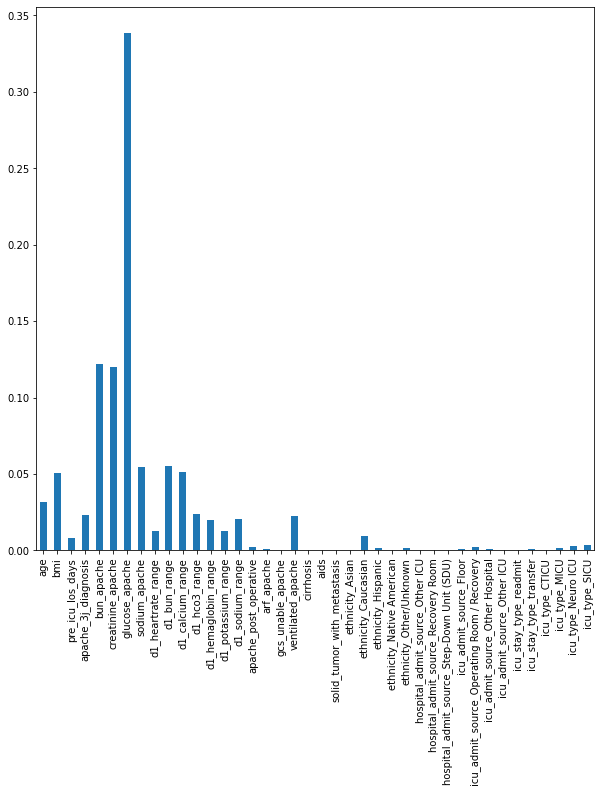

In [539]:
plt.figure(figsize=(10,10))
forest_importances.plot.bar()

- <b>glucose_apache,bun_apache,creatinine_apache are the most important features. Among categorical features only ethnicity_caucasian seems to be important.</b>

In [663]:
Rf_pred=clf_Rf.predict(df_test)

In [664]:
Rf_train_pred=clf_Rf.predict(X_res)

In [665]:
precision_score(y_test,Rf_pred)

0.6149823803569399

In [666]:
recall_score(y_test,Rf_pred)

0.640615748963884

In [667]:
precision_score(y_res,Rf_train_pred)

0.8447547905164015

In [668]:
recall_score(y_res,y_train_pred)

0.6543142773949335

In [669]:
accuracy_score(y_res,Rf_train_pred)

0.8399746172244911

In [670]:
accuracy_score(y_test,Rf_pred)

0.8355357508707232

In [671]:
f1_score(y_test,Rf_pred)

0.6275374086532886

In [672]:
f1_score(y_res,Rf_train_pred)

0.7986693961105424

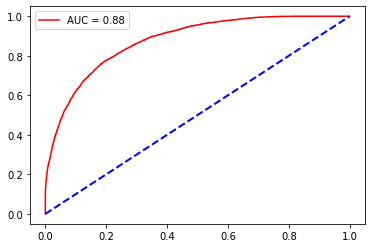

In [673]:
Rf_preds = clf_Rf.predict_proba(df_test)[:,1]   
fpr,tpr,threshold = roc_curve(y_test,Rf_preds,drop_intermediate=False)
auc = roc_auc_score(y_test,Rf_preds)
plt.figure()
plt.plot(fpr,tpr,'r',label = 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'blue',linestyle ='--',lw =2)
plt.legend(loc = 'best')

In [674]:
rf_pred = np.where(Rf_pred>0.54,1,0)
rf_train_pred = np.where(Rf_train_pred>0.54,1,0)
print(f"The train accuracy for 0.54 probability : {accuracy_score(y_res,rf_train_pred)}, test acc : {accuracy_score(y_test,rf_pred)}")
print(f"Precision on train data : {precision_score(y_res,rf_train_pred)}, test precision: {precision_score(y_test,rf_pred)}") 
print(f"Recall on train data : {recall_score(y_res,rf_train_pred)}, test recall: {recall_score(y_test,rf_pred)}")
print(f"f1 on train data : {f1_score(y_res,rf_train_pred)}, test f1: {f1_score(y_test,rf_pred)}")

The train accuracy for 0.54 probability : 0.8399746172244911, test acc : 0.8355357508707232
Precision on train data : 0.8447547905164015, test precision: 0.6149823803569399
Recall on train data : 0.7573522275065515, test recall: 0.640615748963884
f1 on train data : 0.7986693961105424, test f1: 0.6275374086532886


- Filtering down the features to include only important features based on random forest model

In [552]:
X_res=X_res[['age','bmi','pre_icu_los_days','apache_3j_diagnosis','bun_apache','creatinine_apache','glucose_apache','sodium_apache',
            'd1_heartrate_range','d1_bun_range','d1_calcium_range','d1_hco3_range','d1_hemaglobin_range','d1_potassium_range',
            'd1_sodium_range','ventilated_apache','ethnicity_Caucasian']]
df_test = df_test[['age','bmi','pre_icu_los_days','apache_3j_diagnosis','bun_apache','creatinine_apache','glucose_apache','sodium_apache',
            'd1_heartrate_range','d1_bun_range','d1_calcium_range','d1_hco3_range','d1_hemaglobin_range','d1_potassium_range',
            'd1_sodium_range','ventilated_apache','ethnicity_Caucasian']]

- Random Forest gave a good improvement in the model with better accuracy,precision and recall. 

## XGboost Classification

In [553]:
from xgboost import XGBClassifier

In [554]:
X_res.ventilated_apache=X_res.ventilated_apache.astype('int')
df_test.ventilated_apache=df_test.ventilated_apache.astype('int')

In [556]:
xgb = XGBClassifier(objective='binary:logistic')
param_grid_xgb = {"n_estimators":[10,50,100],"learning_rate":[0.1,0.5,1.0]}
kfold=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
clf_xgb = GridSearchCV(xgb,param_grid_xgb,cv=kfold)

In [557]:
clf_xgb.fit(X_res,y_res,eval_metric='logloss')

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
            

In [558]:
clf_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [559]:
clf_xgb.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [560]:
xgb_tuned = XGBClassifier(objective='binary:logistic',learning_rate=0.5,n_estimators=50,gamma=0.05,reg_alpha=0.1,reg_lambda=0.1)

In [561]:
xgb_tuned.fit(X_res,y_res,eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.05, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [562]:
xgb_pred = xgb_tuned.predict(df_test)
xgb_train_pred = xgb_tuned.predict(X_res)

In [564]:
xgb_train_acc = accuracy_score(y_res,xgb_train_pred)
xgb_test_acc = accuracy_score(y_test,xgb_pred)
xgb_train_prec = precision_score(y_res,xgb_train_pred)
xgb_test_prec = precision_score(y_test,xgb_pred)
xgb_train_recall = recall_score(y_res,xgb_train_pred)
xgb_test_recall = recall_score(y_test,xgb_pred)
xgb_train_f1 = f1_score(y_res,xgb_train_pred)
xgb_test_f1 = f1_score(y_test,xgb_pred)

In [566]:
print(f"Train data accuracy : {xgb_train_acc} and Test data accuracy : {xgb_test_acc}")
print(f"Train data precision : {xgb_train_prec} and test data precision : {xgb_test_prec}")
print(f"Train data recall : {xgb_train_recall} and test data recall : {xgb_test_recall}")
print(f"Train data f1 : {xgb_train_f1} and test data f1 : {xgb_test_f1}")

Train data accuracy : 0.9051725540604305 and Test data accuracy : 0.8465990575701701
Train data precision : 0.9204447163561951 and test data precision : 0.6815022918823007
Train data recall : 0.8469377851111327 and test data recall : 0.5457667258732978
Train data f1 : 0.8821626430506694 and test data f1 : 0.6061283534981587


- Further hyperparameter tuning

In [567]:
xgb = XGBClassifier(objective='binary:logistic')
param_grid_xgb = {"n_estimators":[40,50,60],"learning_rate":[0.4,0.5,0.6],"gamma":[0.1,0.2]}
kfold=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
clf_xgb = GridSearchCV(xgb,param_grid_xgb,cv=kfold)

In [568]:
clf_xgb.fit(X_res,y_res,eval_metric='logloss')

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_...d_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [569]:
clf_xgb.best_params_

{'gamma': 0.1, 'learning_rate': 0.4, 'n_estimators': 60}

In [570]:
xgb = XGBClassifier(objective='binary:logistic')
param_grid_xgb = {"n_estimators":[60,70,80],"learning_rate":[0.2,0.3,0.4],"gamma":[0.1,0.05]}
kfold=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
clf_xgb = GridSearchCV(xgb,param_grid_xgb,cv=kfold)

In [571]:
clf_xgb.fit(X_res,y_res,eval_metric='logloss')

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_..._weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
              

In [572]:
clf_xgb.best_params_

{'gamma': 0.05, 'learning_rate': 0.3, 'n_estimators': 80}

In [573]:
xgb_tuned = XGBClassifier(objective='binary:logistic',learning_rate=0.3,n_estimators=80,gamma=0.05,reg_alpha=0.1,reg_lambda=0.1)

In [574]:
xgb_tuned.fit(X_res,y_res,eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.05, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [575]:
xgb_pred = xgb_tuned.predict(df_test)
xgb_train_pred = xgb_tuned.predict(X_res)

In [576]:
xgb_train_acc = accuracy_score(y_res,xgb_train_pred)
xgb_test_acc = accuracy_score(y_test,xgb_pred)
xgb_train_prec = precision_score(y_res,xgb_train_pred)
xgb_test_prec = precision_score(y_test,xgb_pred)
xgb_train_recall = recall_score(y_res,xgb_train_pred)
xgb_test_recall = recall_score(y_test,xgb_pred)
xgb_train_f=f1_score(y_res,xgb_train_pred)
xgb_test_f=f1_score(y_test,xgb_pred)

In [577]:
print(f"Train data accuracy : {xgb_train_acc} and Test data accuracy : {xgb_test_acc}")
print(f"Train data precision : {xgb_train_prec} and test data precision : {xgb_test_prec}")
print(f"Train data recall : {xgb_train_recall} and test data recall : {xgb_test_recall}")
print(f"Train data f1 score : {xgb_train_f} and test data f1 score : {xgb_test_f}")

Train data accuracy : 0.9069135521241803 and Test data accuracy : 0.8514392542511781
Train data precision : 0.9240259877679724 and test data precision : 0.6976083707025411
Train data recall : 0.8475783752305154 and test data recall : 0.5526346950858496
Train data f1 score : 0.8841527620281874 and test data f1 score : 0.6167162206805418


- XGBoost Classifier is performing well in terms of accuracy. But RF classifier seems better wrt precision and recall.

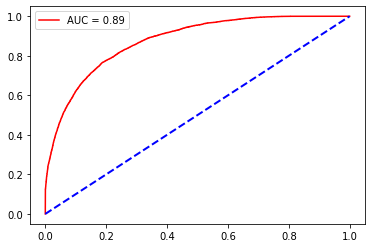

In [579]:
xgb_preds = xgb_tuned.predict_proba(df_test)[:,1]   
fpr,tpr,threshold = roc_curve(y_test,Rf_preds,drop_intermediate=False)
auc = roc_auc_score(y_test,xgb_preds)
plt.figure()
plt.plot(fpr,tpr,'r',label = 'AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'blue',linestyle ='--',lw =2)
plt.legend(loc = 'best')

## Neural Network

In [580]:
import tensorflow as tf

In [581]:
X_tf = np.array(X_res)
X_test_tf = np.array(df_test)
y_tf = np.array(y_res)
y_test_tf =np.array(y_test)

In [582]:
X_tf.shape

(122918, 17)

In [583]:
X_tf= tf.constant(X_tf,dtype='float32')
y_tf = tf.constant(y_tf,dtype='float32')
X_test_tf = tf.constant(X_test_tf,dtype='float32')
y_test_tf = tf.constant(y_test_tf,dtype='float32')

In [584]:
tf_train_data = tf.data.Dataset.from_tensor_slices((X_tf,y_tf))
tf_test_data = tf.data.Dataset.from_tensor_slices((X_test_tf,y_test_tf))

In [585]:
tf_train_data=tf_train_data.batch(64)
tf_test_data=tf_test_data.batch(64)

## Network design
- Input layer has 17 inputs and output layer should have 1 outputs for binary classification probabilities
- Can start with 2 dense hidden layers, 1st with 17 neurons and 2nd hidden layer with 10 neurons
- Let the activation function in hidden layers be ReLU
- Output layer activation function would be sigmoid 

In [586]:
tf_model = tf.keras.Sequential(
        [tf.keras.layers.Dense(units=17,input_shape=(17,),activation = 'relu'),
         tf.keras.layers.Dense(units =10,activation= 'relu'),
         tf.keras.layers.Dense(units=1,activation='sigmoid')
        ]
)

In [587]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                306       
                                                                 
 dense_1 (Dense)             (None, 10)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [589]:
tf.random.set_seed(100)
tf_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
tf_model.fit(tf_train_data,epochs =100)

Epoch 1/100
1921/1921 [==============================] - 4s 2ms/step - loss: 0.4140 - accuracy: 0.8175
Epoch 2/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3830 - accuracy: 0.8355
Epoch 3/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3714 - accuracy: 0.8405
Epoch 4/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3677 - accuracy: 0.8413
Epoch 5/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3655 - accuracy: 0.8417
Epoch 6/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3639 - accuracy: 0.8421
Epoch 7/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3622 - accuracy: 0.8424
Epoch 8/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3605 - accuracy: 0.8429
Epoch 9/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.3584 - accuracy: 0.8429
Epoch 10/100
1921/1921 [==============================] - 3s 1ms/step - l

1921/1921 [==============================] - 3s 1ms/step - loss: 0.2930 - accuracy: 0.8703
Epoch 80/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2929 - accuracy: 0.8704
Epoch 81/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2927 - accuracy: 0.8707
Epoch 82/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2925 - accuracy: 0.8708
Epoch 83/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2922 - accuracy: 0.8711
Epoch 84/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2919 - accuracy: 0.8713
Epoch 85/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2917 - accuracy: 0.8714
Epoch 86/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2914 - accuracy: 0.8714
Epoch 87/100
1921/1921 [==============================] - 3s 1ms/step - loss: 0.2914 - accuracy: 0.8715
Epoch 88/100
1921/1921 [==============================] - 3s 1ms/step - loss:

In [590]:
tf_train_acc=tf_model.evaluate(X_tf,y_tf)
tf_test_acc = tf_model.evaluate(X_test_tf,y_test_tf)

1221/1221 [==============================] - 2s 1ms/step - loss: 4.0401 - accuracy: 0.2208


In [591]:
tf_preds = tf_model.predict(X_test_tf)
tf_train_preds =tf_model.predict(X_tf)

In [592]:
tf_preds = np.where(tf_preds>0.54,1,0)
tf_train_preds = np.where(tf_train_preds>0.54,1,0)

In [593]:
accuracy_score(y_test_tf,tf_preds)

0.22172710510141364

In [594]:
accuracy_score(y_tf,tf_train_preds)

0.4233228656502709

- This network model performed very poorly. another network design to be modelled

In [595]:
##Network -2
tf_model = tf.keras.Sequential(
        [tf.keras.layers.Dense(units=10,input_shape=(17,),activation = 'tanh'),
         tf.keras.layers.Dense(units =20,activation= 'tanh'),
         tf.keras.layers.Dense(units =10,activation= 'tanh'),
         tf.keras.layers.Dense(units=1,activation='sigmoid')
        ]
)

In [596]:
tf_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
tf_model.fit(tf_train_data,epochs =100,verbose=0)

In [597]:
tf_preds = tf_model.predict(X_test_tf)
tf_train_preds =tf_model.predict(X_tf)

In [598]:
tf_preds = np.where(tf_preds>0.54,1,0)
tf_train_preds = np.where(tf_train_preds>0.54,1,0)

In [600]:
accuracy_score(y_test_tf,tf_preds)

0.22736119647613193

In [602]:
accuracy_score(y_tf,tf_train_preds)

0.4271709595014563

In [603]:
tf_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                180       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
